In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('autos.csv',encoding='latin_1')
zip_codes = pd.read_csv('Zipcodes.csv')
zip_codes = zip_codes.loc[:,['zipcode','state']]

C:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = df.merge(zip_codes,how='left',left_on='postalCode',right_on='zipcode',validate = 'm:1')
df.drop(columns='zipcode',inplace=True)
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,state
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57,Baden-Württemberg
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50,Rheinland-Pfalz
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46,Bayern
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17,Bayern
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21,Hessen


# Converting all German values to English

In [ ]:
df['seller'].value_counts()

privat        371525
gewerblich         3
Name: seller, dtype: int64

In [ ]:
df['seller'].replace({'privat':'private',
                      'gewerblich':'commercial'},
                     inplace = True)
df['seller'].head()

0    private
1    private
2    private
3    private
4    private
Name: seller, dtype: object

In [ ]:
df['offerType'].value_counts()

Angebot    371516
Gesuch         12
Name: offerType, dtype: int64

In [ ]:
df['offerType'].replace({'Angebot':'offer',
                      'Gesuch':'application'},
                     inplace = True)
df['offerType'].head()

0    offer
1    offer
2    offer
3    offer
4    offer
Name: offerType, dtype: object

In [ ]:
df['abtest'].value_counts()

test       192585
control    178943
Name: abtest, dtype: int64

In [ ]:
df['vehicleType'].value_counts()

limousine     95894
kleinwagen    80023
kombi         67564
bus           30201
cabrio        22898
coupe         19015
suv           14707
andere         3357
Name: vehicleType, dtype: int64

In [ ]:
df['vehicleType'].replace({'kleinwagen':'small car',
                      'kombi':'microbus',
                      'cabrio':'convertible',
                      'andere' : 'other'},
                     inplace = True)
df['vehicleType'].head()

0          NaN
1        coupe
2          suv
3    small car
4    small car
Name: vehicleType, dtype: object

In [ ]:
df['gearbox'].value_counts()

manuell      274214
automatik     77105
Name: gearbox, dtype: int64

In [ ]:
df['gearbox'].replace({'manuell':'manual',
                      'automatik':'automatic'},
                     inplace = True)
df['gearbox'].head()

0       manual
1       manual
2    automatic
3       manual
4       manual
Name: gearbox, dtype: object

In [ ]:
orig_list = list(df['model'].value_counts().index)
converted_list = ['golf','other','3s','polo','corsa','astra','passat','a4','cclass','5s','eclass','a3','a6','focus','fiesta','transporter','twingo','2series','fortwo','aclass','vectra','1s','mondeo','clio','touran','3series','punto','zafira','megane','ibiza','ka','lupo','xseries','octavia','cooper','fabia','clk','micra','caddy','80','sharan','scenic','omega','slk','leon','laguna','civic','tt','1stseries','6series','iseries','galaxy','mclass','7s','meriva','yaris','great','mxseries','a5','kangoo','911','bclass','500','tiguan','vito','escort','one','arosa','zseries','bora','colt','beetle','berlingo','sprinter','tigra','v40','transit','touareg','fox','swift','insignia','c_max','corolla','panda','seicento','sl','v70','4series','scirocco','156','a1','primera','espace','grand','stilo','almera','a8','147','avensis','qashqai','eos','c3','c5','signum','Beetle','s_max','5series','q5','c4','matiz','ducato','agila','aygo','viano','getz','601','combo','100','carisma','cayenne','boxster','alhambra','cordoba','c2','superb','c1','kuga','forfour','rio','jetta','cuore','a2','altea','cadet','rav','picanto','sorento','mseries','accord','crseries','up','q7','vivaro','toledo','voyager','xcseries','Bravo','santa','doblo','logan','mode','verso','ptcruiser','cl','sportage','jazz','fusion','sandero','mustang','roomster','carnival','6s','ceed','gallant','v50','q3','tucson','lancer','auris','impreza','phaeton','freelander','glk','calibra','pajero','x_trail','850','159','jimny','ypsilon','spider','duster','clubman','yeti','cseries','cc','roadster','cherokee','x_type','gclass','captiva','vclass','wrangler','legacy','s60','300c','rxseries','defender','justy','sirion','forester','outlander','grade','niva','s_type','spark','r19','navara','cxseries','aveo','900','antara','90','juke','discovery','exeo','range_rover_sport','kalos','range_rover','citigo','lanos','mii','crossfire','range_rover_evoque','gl','nubira','move','lybra','145','v60','croma','amarok','delta','terios','lodgy','9000','charade','b_max','musa','materia','200','kappa','samara','elefantino','i3','kalina','serie_2','rangerover','serie_3','serie_1','discovery_sport']

In [ ]:
df['model'].replace(dict(zip(orig_list,converted_list)),inplace = True)
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,state
0,2016-03-24 11:52:17,Golf_3_1.6,private,offer,480,test,NaN,1993,manual,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57,Baden-Württemberg
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,offer,18300,test,coupe,2011,manual,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50,Rheinland-Pfalz
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800,test,suv,2004,automatic,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46,Bayern
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,offer,1500,test,small car,2001,manual,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17,Bayern
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600,test,small car,2008,manual,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21,Hessen


In [ ]:
df['monthOfRegistration'].value_counts()

0     37675
3     36170
6     33167
4     30918
5     30631
7     28958
10    27337
11    25489
12    25380
9     25074
1     24561
8     23765
2     22403
Name: monthOfRegistration, dtype: int64

In [ ]:
df['fuelType'].value_counts()

benzin     223857
diesel     107746
lpg          5378
cng           571
hybrid        278
andere        208
elektro       104
Name: fuelType, dtype: int64

In [ ]:
df['fuelType'].replace({'benzin':'petrol',
                      'andere':'other',
                      'elektro':'electric'},
                     inplace = True)
df['fuelType'].head()

0    petrol
1    diesel
2    diesel
3    petrol
4    diesel
Name: fuelType, dtype: object

In [ ]:
df['brand'].value_counts()

volkswagen        79640
bmw               40274
opel              40136
mercedes_benz     35309
audi              32873
ford              25573
renault           17969
peugeot           11027
fiat               9676
seat               7022
mazda              5695
skoda              5641
smart              5249
citroen            5182
nissan             5037
toyota             4694
sonstige_autos     3982
hyundai            3646
mini               3394
volvo              3327
mitsubishi         3061
honda              2836
kia                2555
alfa_romeo         2345
suzuki             2328
porsche            2215
chevrolet          1845
chrysler           1452
dacia               900
jeep                807
daihatsu            806
subaru              779
land_rover          770
jaguar              621
trabant             591
daewoo              542
saab                530
rover               490
lancia              484
lada                225
Name: brand, dtype: int64

In [ ]:
df['notRepairedDamage'].value_counts()

nein    263182
ja       36286
Name: notRepairedDamage, dtype: int64

In [ ]:
df['notRepairedDamage'].replace({'nein':'No',
                      'ja':'Yes'},
                     inplace = True)
df['notRepairedDamage'].head()

0    NaN
1    Yes
2    NaN
3     No
4     No
Name: notRepairedDamage, dtype: object

In [ ]:
df.head(3)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,state
0,2016-03-24 11:52:17,Golf_3_1.6,private,offer,480,test,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57,Baden-Württemberg
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,offer,18300,test,coupe,2011,manual,190,NaN,125000,5,diesel,audi,Yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50,Rheinland-Pfalz
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800,test,suv,2004,automatic,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46,Bayern


# Exploring the dataset

In [ ]:
df.shape

(371528, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371528 entries, 0 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [ ]:
df['dateCrawled'] = pd.to_datetime(df['dateCrawled'])
df['dateCreated'] = pd.to_datetime(df['dateCreated'])
df['lastSeen'] = pd.to_datetime(df['lastSeen'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371528 entries, 0 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dateCrawled          371528 non-null  datetime64[ns]
 1   name                 371528 non-null  object        
 2   seller               371528 non-null  object        
 3   offerType            371528 non-null  object        
 4   price                371528 non-null  int64         
 5   abtest               371528 non-null  object        
 6   vehicleType          333659 non-null  object        
 7   yearOfRegistration   371528 non-null  int64         
 8   gearbox              351319 non-null  object        
 9   powerPS              371528 non-null  int64         
 10  model                351044 non-null  object        
 11  kilometer            371528 non-null  int64         
 12  monthOfRegistration  371528 non-null  int64         
 13  fuelType      

In [ ]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,state
0,2016-03-24 11:52:17,Golf_3_1.6,private,offer,480,test,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57,Baden-Württemberg
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,offer,18300,test,coupe,2011,manual,190,NaN,125000,5,diesel,audi,Yes,2016-03-24,0,66954,2016-04-07 01:46:50,Rheinland-Pfalz
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800,test,suv,2004,automatic,163,grand,125000,8,diesel,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46,Bayern
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,offer,1500,test,small car,2001,manual,75,golf,150000,6,petrol,volkswagen,No,2016-03-17,0,91074,2016-03-17 17:40:17,Bayern
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600,test,small car,2008,manual,69,fabia,90000,7,diesel,skoda,No,2016-03-31,0,60437,2016-04-06 10:17:21,Hessen


In [ ]:
def get_missing_val_count_df(df):
  missing_count_list = []
  for col in df.columns:
    missing_count_list.append(df[col].isnull().sum())
  missing_count_df = pd.DataFrame(missing_count_list,columns=['count'],index = df.columns)
  return missing_count_df.sort_values('count',ascending=False)
get_missing_val_count_df(df)

,count
notRepairedDamage,72060
vehicleType,37869
fuelType,33386
model,20484
gearbox,20209
state,194
abtest,0
yearOfRegistration,0
price,0
powerPS,0


## Price

In [ ]:
df['price'].describe()

count    3.715280e+05
mean     1.729514e+04
std      3.587954e+06
min      0.000000e+00
25%      1.150000e+03
50%      2.950000e+03
75%      7.200000e+03
max      2.147484e+09
Name: price, dtype: float64

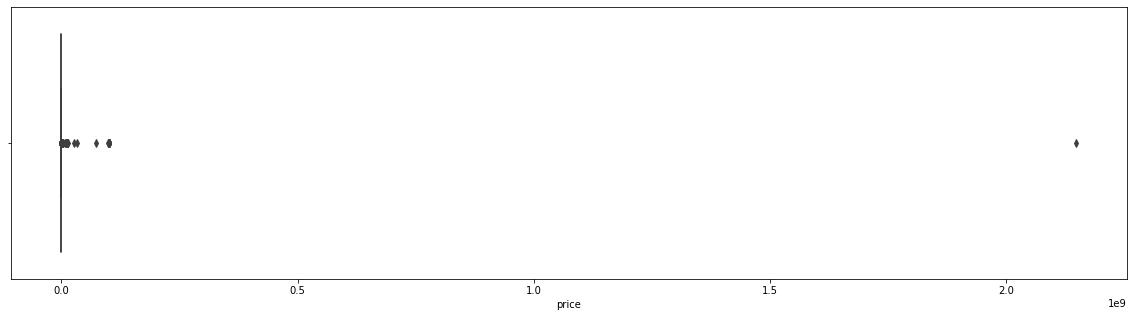

In [ ]:
plt.figure(figsize = (20,5))
sns.boxplot(df['price'])

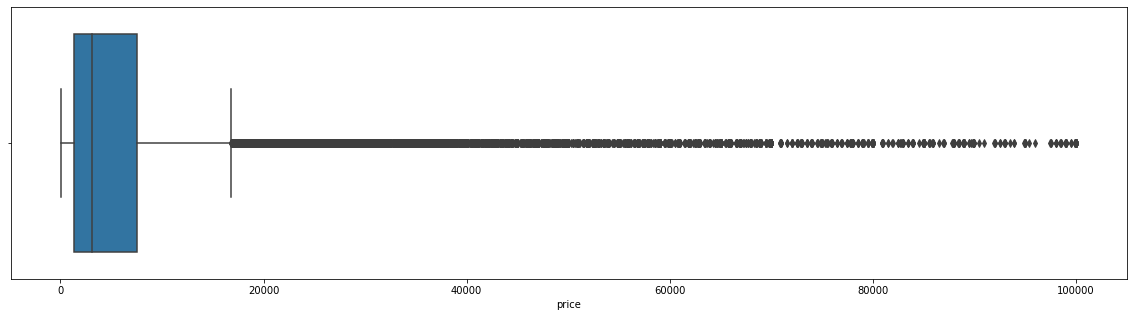

In [ ]:
plt.figure(figsize = (20,5))
sns.boxplot(df[(df['price']>=100) & (df['price']<=100000)]['price'])

### Outlier detection using Isolation Forest

In [ ]:
dfprice = df[(df['price'].isnull() == False)]['price']

[[0.00000000e+00]
 [5.78015500e+03]
 [1.15603100e+04]
 ...
 [2.14747209e+09]
 [2.14747787e+09]
 [2.14748365e+09]]


Text(0.5, 1.0, 'price')

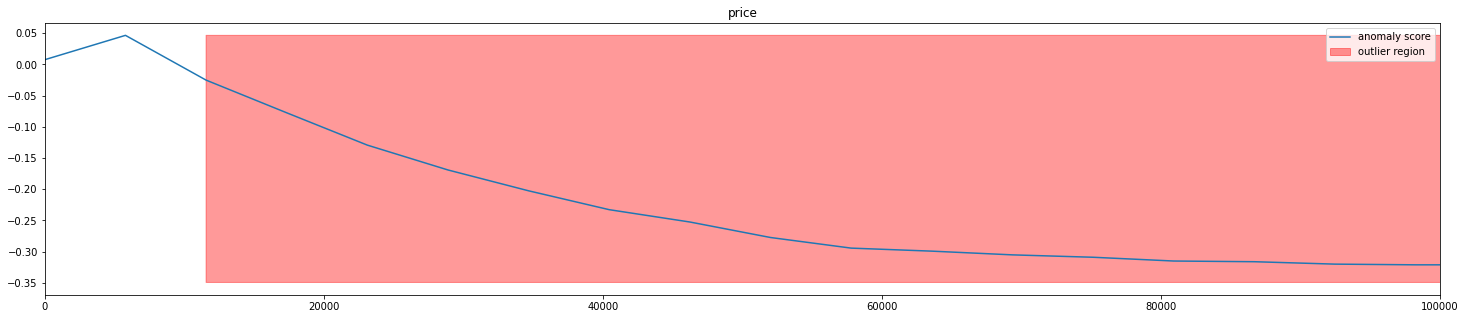

In [ ]:
#Import necessary libraries
from sklearn.ensemble import IsolationForest
#The required columns
isolation_forest = IsolationForest(contamination='auto')
isolation_forest.fit(dfprice.values.reshape(-1,1))

xx = np.linspace(dfprice.min(), dfprice.max(), len(df)).reshape(-1,1)
print(xx)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)

plt.figure(figsize=(25,5))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                     where=outlier==-1, color='r', 
                     alpha=.4, label='outlier region')
plt.legend()
plt.xlim(0, 100000)
# plt.axis([0,100000,0,0])
plt.title('price')

If we see from the above plot, almost all data point above 12000 seems to come under outliers, but dropping all of those does not seem to be a feasible solution. We can also see that data points after 100000 have consistently very low anamoly score, so we can go ahead and drop those data points, and the remaining outliers can be handled further using transformation techniques. Also data points with price below 100 also seem to be very low as far as price of a used car is concerned, so we will also drop those data points which have price below 100.

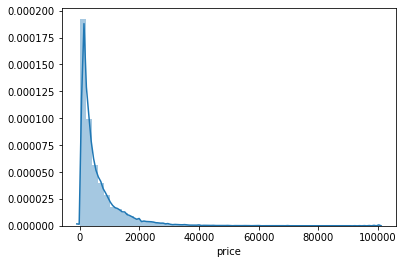

In [ ]:
sns.distplot(df[(df['price']>=100) & (df['price']<=100000)]['price'])

In [ ]:
df[(df['price']>=100) & (df['price']<=100000)].shape

(357805, 21)

In [ ]:
df2 = df[(df['price']>=100) & (df['price']<=100000)]

### Checking for Missing Values

In [ ]:
get_missing_val_count_df(df2)

,count
notRepairedDamage,65197
vehicleType,32947
fuelType,28773
model,17703
gearbox,16621
state,183
abtest,0
yearOfRegistration,0
price,0
powerPS,0


No missing values for price feature.

### Statistical Analysis
Check for Normality - Shapiro Test

H0 : Price is normally distributed

In [ ]:
from scipy.stats import shapiro
shapiro(df2['price'])

(0.6681488752365112, 0.0)

As we can see the pvalue is less than 0.05. So we can reject the null hypothesis that price is normally distributed.
We will use log transformation for converting price to normal distribution after we are done with any imputation in our dataset.

## Kilometers
Number of kilometers car has driven

In [ ]:
df2['kilometer'].describe()

count    357805.000000
mean     125871.606042
std       39527.680682
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: kilometer, dtype: float64

In [ ]:
df2['kilometer'].value_counts()

150000    231509
125000     37222
100000     15349
90000      12319
80000      10859
70000       9635
60000       8563
50000       7505
40000       6295
30000       5890
20000       5452
5000        5406
10000       1801
Name: kilometer, dtype: int64

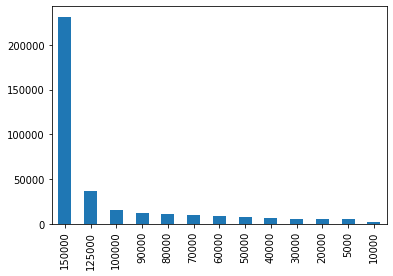

In [ ]:
df2['kilometer'].value_counts().plot(kind = 'bar')

Seems like the website had certain options from which a user could select the number of kilometers the car has been driven instead of providing a place to put in an exact number. We could use this as a categorical variable instead of continous variable.

### Statistical Analysis
Is there any discrepancy in avg price with respect to Kilometers.

H0 : avg_price_5000_km = avg_price_10000_km = avg_price_20000_km = avg_price_30000_km = ..... = avg_price_150000_km

H1 : avg_price_5000_km != avg_price_10000_km != avg_price_20000_km != avg_price_30000_km != ..... != avg_price_150000_km

In [ ]:
from scipy.stats import f_oneway
def oneway_posthoc(i):
    cat = {}
    for j in range(df2[i].nunique()):
        if pd.isna(df2[i].unique()[j]) == False:
            cat[df2[i].unique()[j]] = df2[df2[i] == df2[i].unique()[j]]['price']
    tstat,pval = f_oneway(*list(cat.values()))
    print(f'pvalue for {i} is {pval}')
    print()
    for k in cat:
        print(f'Avg price of car for {i} = {k} is ',cat[k].mean())

In [ ]:
oneway_posthoc('kilometer')

pvalue for kilometer is 0.0

Avg price of car for kilometer = 150000 is  3766.229239468012
Avg price of car for kilometer = 125000 is  6233.0077910912905
Avg price of car for kilometer = 90000 is  8530.984820196445
Avg price of car for kilometer = 30000 is  15513.761460101867
Avg price of car for kilometer = 70000 is  10783.866424494032
Avg price of car for kilometer = 5000 is  7055.269330373659
Avg price of car for kilometer = 100000 is  7712.39220796143
Avg price of car for kilometer = 60000 is  11755.809879715052
Avg price of car for kilometer = 20000 is  16269.871423330887
Avg price of car for kilometer = 80000 is  9449.329404180864
Avg price of car for kilometer = 50000 is  13182.09926715523
Avg price of car for kilometer = 40000 is  14822.27561556791
Avg price of car for kilometer = 10000 is  20042.599111604664


We can see from the oneway test that the price of used car is affected by kilometers as the pvalue is less than 0.05

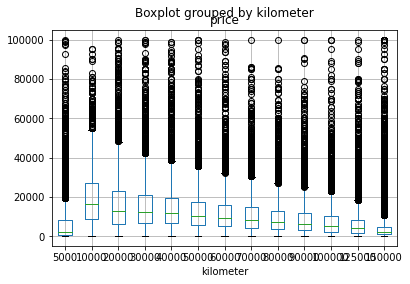

In [ ]:
df2.boxplot(column='price',by = 'kilometer')

As we can see quite evidently that the average price of a used car starts decreasing as the number of kilometers it has run increases.

### NotRepairedDamaged 
If the car has a damage which is not repaired yet

In [ ]:
df2['notRepairedDamage'].describe()

count     292608
unique         2
top           No
freq      258897
Name: notRepairedDamage, dtype: object

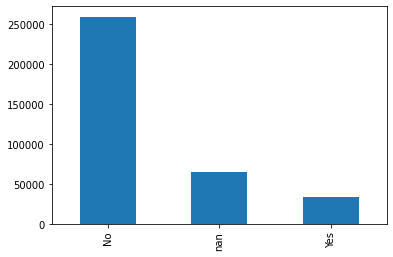

In [ ]:
df2['notRepairedDamage'].value_counts(dropna = False).plot(kind = 'bar')

Imputation of the values for notRepairedDamaged does not really make sense because we will not be able to determine whether the car was damaged or not by using other features in the dataset. So we will drop the NA values.

In [ ]:
df2 = df2[df2['notRepairedDamage'].isnull() == False]

### Statistical Analysis
Is there any discrepancy in avg price with respect to notRepairedDamage.

H0 : avg_price_notRepaired = avg_price_Repaired

H1 : avg_price_notRepaired != avg_price_Repaired

In [ ]:
price_repaired = df2.loc[df2['notRepairedDamage'] == 'No','price']
price_notRepaired = df2.loc[df2['notRepairedDamage'] == 'Yes','price']

Shapiro Test - Test for Normality

In [ ]:
print(shapiro(price_repaired))
print(shapiro(price_notRepaired))

(0.7012583017349243, 0.0)
(0.49935317039489746, 0.0)


The prices for both repaired and not repaired cars is not normally distributed as pvalue is less than 0.05.

Bartlett Test - Test for equal variance

In [ ]:
from scipy.stats import bartlett
print(bartlett(price_repaired,price_notRepaired))

BartlettResult(statistic=24690.66594067853, pvalue=0.0)


The variance in price for repaired car is not equal to that in a not repaired car as pvallue is less that 0.05. So for a non parametric independent 2 sample t-test we will go with manwhitneyu test.

Manwhitneyu Test

H0 : Average price of repaired car is equal to average price of not repaired car.

In [ ]:
from scipy.stats import mannwhitneyu
print(mannwhitneyu(price_repaired,price_notRepaired))

MannwhitneyuResult(statistic=1881704876.5, pvalue=0.0)


We can see from the manwhitneyu test that the price of used car is affected by the fact that whether its repaired or not as the pvalue is less than 0.05

Post hoc analysis

In [ ]:
print('Avg price for car which has been repaired : ',price_repaired.mean())
print('Avg price for car which has not been repaired : ',price_notRepaired.mean())

Avg price for car which has been repaired :  6925.99075694195
Avg price for car which has not been repaired :  2250.0218326362315


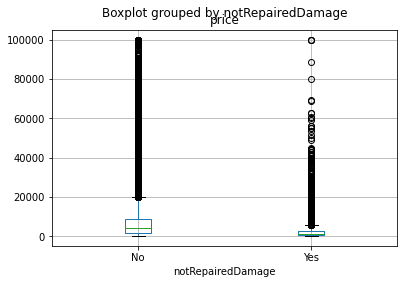

In [ ]:
df2.boxplot(column='price',by = 'notRepairedDamage')

As we can see quite evidently that the average price of a used car which has been repaired is higher that that which has not been repaired.

### VehicleType

In [ ]:
df2['vehicleType'].describe()

count        276862
unique            8
top       limousine
freq          80413
Name: vehicleType, dtype: object

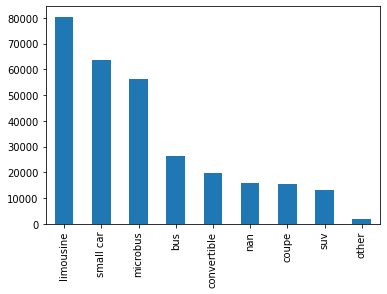

In [ ]:
df2['vehicleType'].value_counts(dropna = False).plot(kind = 'bar')

We can impute the values of vehicleType depending on model,brand and price of the car.

### Statistical Analysis
Is there any discrepancy in avg price with respect to vehicleType.

H0 : avg_price_limousine = avg_price_small_car = avg_price_microbus = ..... = avg_price_other

H1 : avg_price_limousine != avg_price_small_car != avg_price_microbus != ..... != avg_price_other

In [ ]:
oneway_posthoc('vehicleType')

pvalue for vehicleType is 0.0

Avg price of car for vehicleType = coupe is  11298.496694267924
Avg price of car for vehicleType = small car is  3071.054518579089
Avg price of car for vehicleType = limousine is  6350.043052740229
Avg price of car for vehicleType = convertible is  10689.742659671072
Avg price of car for vehicleType = microbus is  6259.362793594306
Avg price of car for vehicleType = suv is  13637.686801756683
Avg price of car for vehicleType = bus is  7007.458628841608


We can see from the oneway test that the price of used car is affected by vehcleType as the pvalue is less than 0.05

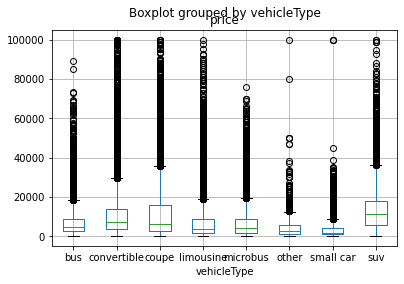

In [ ]:
df2.boxplot(column='price',by = 'vehicleType')

As we can see quite evidently that the average price of a used car varies significantly for different type of vehicles.

### FuelType

In [ ]:
df2['fuelType'].describe()

count     277281
unique         7
top       petrol
freq      180463
Name: fuelType, dtype: object

petrol      180463
diesel       91574
NaN          15327
lpg           4311
cng            504
hybrid         250
other           94
electric        85
Name: fuelType, dtype: int64


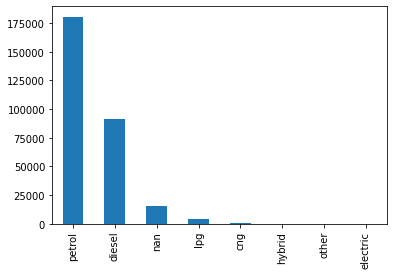

In [ ]:
print(df2['fuelType'].value_counts(dropna = False))
df2['fuelType'].value_counts(dropna = False).plot(kind = 'bar')

Imputation of the values for fuelType does not really make sense because we will not be able to determine what type of fuelType the car belongs to by using other features in the dataset. So we will drop the NA values.

In [ ]:
df2 = df2[df2['fuelType'].isnull() == False]

### Statistical Analysis
Is there any discrepancy in avg price with respect to fuelType.

H0 : avg_price_petrol_car = avg_price_diesel_car = avg_price_lpg_car = ..... = avg_price_other_fuelType

H1 : avg_price_petrol_car != avg_price_diesel_car != avg_price_lpg_car != ..... != avg_price_other_fuelType

In [ ]:
oneway_posthoc('fuelType')

pvalue for fuelType is 0.0

Avg price of car for fuelType = diesel is  9086.161334003102
Avg price of car for fuelType = petrol is  5279.193408067028
Avg price of car for fuelType = lpg is  4670.095105543957
Avg price of car for fuelType = other is  5353.063829787234
Avg price of car for fuelType = hybrid is  13597.392
Avg price of car for fuelType = cng is  4991.855158730159
Avg price of car for fuelType = electric is  12957.552941176471


We can see from the oneway test that the price of used car is affected by fuelType as the pvalue is less than 0.05

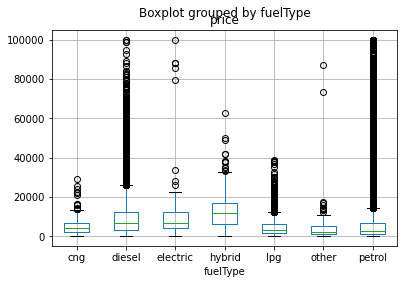

In [ ]:
df2.boxplot(column='price',by = 'fuelType')

As we can see quite evidently that the average price of a used car varies significantly for different fueltypes of vehicles.

### Model

In [ ]:
df2['model'].describe()

count     269435
unique       250
top         golf
freq       22025
Name: model, dtype: object

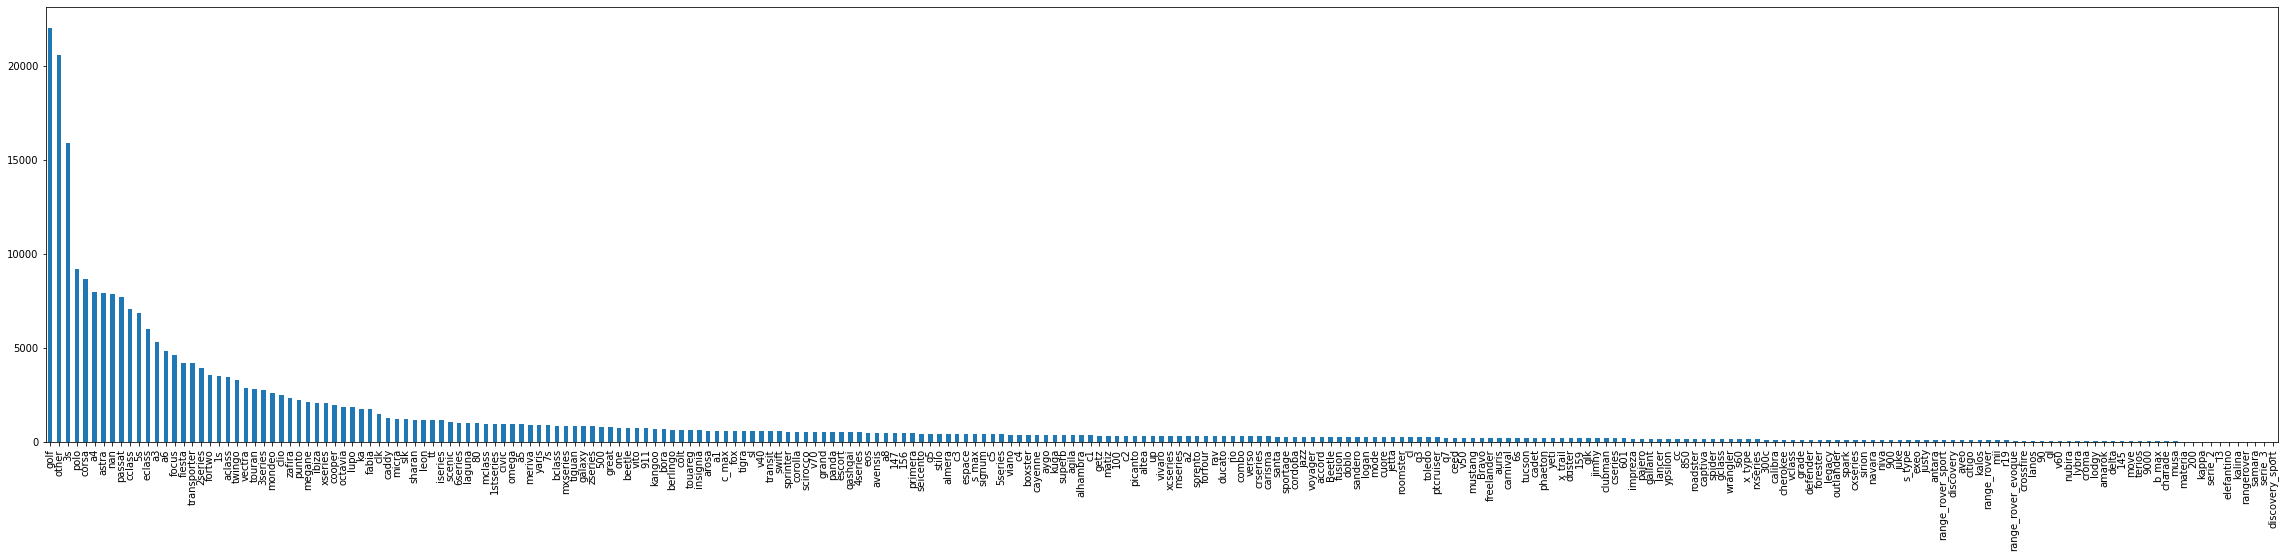

In [ ]:
plt.figure(figsize=(40,8))
df2['model'].value_counts(dropna = False).plot(kind = 'bar')

Imputation of the values for model does not really make sense because we will not be able to determine what type of model the car belongs to by using other features in the dataset. So we will drop the NA values.

In [ ]:
df2 = df2[df2['model'].isnull() == False]

### Statistical Analysis
Is there any discrepancy in avg price with respect to model.

H0 : avg_price_golf = avg_price_3s = avg_price_polo = ..... = avg_price_discovery_sport

H1 : avg_price_golf != avg_price_3s != avg_price_polo != ..... != avg_price_discovery_sport

In [ ]:
oneway_posthoc('model')

pvalue for model is 0.0

Avg price of car for model = golf is  5553.614982973893
Avg price of car for model = fabia is  4409.561997703789
Avg price of car for model = 3s is  6543.775203072854
Avg price of car for model = 2series is  3426.5606214977074
Avg price of car for model = 3series is  3655.3863885839737
Avg price of car for model = passat is  5525.272018706158
Avg price of car for model = navara is  13893.712871287129
Avg price of car for model = twingo is  1658.012534393152
Avg price of car for model = c_max is  6575.927586206896
Avg price of car for model = aclass is  4484.408652440807
Avg price of car for model = scirocco is  11925.33088235294
Avg price of car for model = 5s is  8771.478615071283
Avg price of car for model = meriva is  4825.797740112995
Avg price of car for model = arosa is  1211.047619047619
Avg price of car for model = other is  7558.752986886839
Avg price of car for model = civic is  3384.0
Avg price of car for model = transporter is  11193.689638669539
Av

We can see from the oneway test that the price of used car is affected by model of the car as the pvalue is less than 0.05

As we can see quite evidently that the average price of a used car varies significantly for different models of vehicles.

### Gearbox

In [ ]:
df2['gearbox'].describe()

count     264368
unique         2
top       manual
freq      203206
Name: gearbox, dtype: object

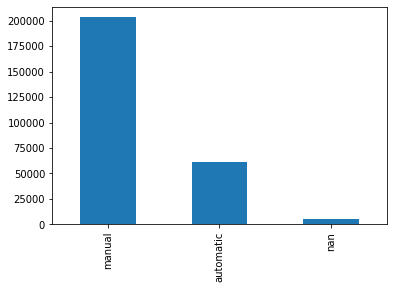

In [ ]:
df2['gearbox'].value_counts(dropna = False).plot(kind = 'bar')

Imputation of the values for gearBox does not really make sense because we will not be able to determine what type of gearBox the car belongs to by using other features in the dataset. So we will drop the NA values.

In [ ]:
df2 = df2[df2['gearbox'].isnull() == False]

### Statistical Analysis
Is there any discrepancy in avg price with respect to the type of gearbox.

H0 : avg_price_manual = avg_price_automatic

H1 : avg_price_manual != avg_price_automatic

In [ ]:
price_manual = df2.loc[df2['gearbox'] == 'manual','price']
price_automatic = df2.loc[df2['gearbox'] == 'automatic','price']

Shapiro Test - Test for Normality

In [ ]:
print(shapiro(price_manual))
print(shapiro(price_automatic))

(0.6999170780181885, 0.0)
(0.8082993030548096, 0.0)


The prices for cars with both manual and automatic gearbox are not normally distributed as pvalue is less than 0.05.

Bartlett Test - Test for equal variance

In [ ]:
from scipy.stats import bartlett
print(bartlett(price_manual,price_automatic))

BartlettResult(statistic=40113.51538001386, pvalue=0.0)


The variance in price for car with automatic gearbox is not equal to the car with manual gearbox as pvalue is less that 0.05. So for a non parametric independent 2 sample t-test we will go with manwhitneyu test.

Manwhitneyu Test

H0 : Average price of car with automatic gearbox is equal to average price of car with manual gearbox.

In [ ]:
from scipy.stats import mannwhitneyu
print(mannwhitneyu(price_manual,price_automatic))

MannwhitneyuResult(statistic=3630651119.5, pvalue=0.0)


We can see from the manwhitneyu test that the price of used car is affected by the fact that whether its an automatic or manual gearbox car as the pvalue is less than 0.05

Post hoc analysis

In [ ]:
print('Avg price for car which has manual gearbox : ',price_manual.mean())
print('Avg price for car which has automatic gearbox : ',price_automatic.mean())

Avg price for car which has manual gearbox :  5181.471482141275
Avg price for car which has automatic gearbox :  11257.848026552434


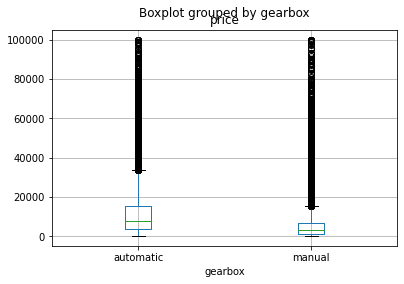

In [ ]:
df2.boxplot(column='price',by = 'gearbox')

As we can see quite evidently that the average price of a used car which has an automatic gearbox is higher than that which has a manual gearbox.

### Seller

In [ ]:
df2['seller'].describe()

count      264368
unique          2
top       private
freq       264366
Name: seller, dtype: object

private       264366
commercial         2
Name: seller, dtype: int64


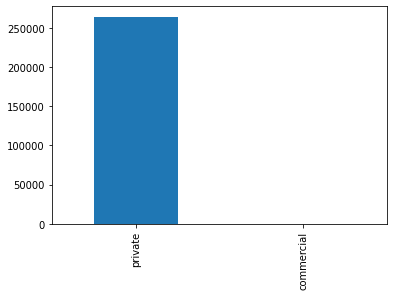

In [ ]:
print(df2['seller'].value_counts(dropna = False))
df2['seller'].value_counts(dropna = False).plot(kind = 'bar')

The data in this features seems extremely imbalanced. So we will consider dropping this feature.

### OfferType

In [ ]:
df2['offerType'].describe()

count     264368
unique         2
top        offer
freq      264367
Name: offerType, dtype: object

offer          264367
application         1
Name: offerType, dtype: int64


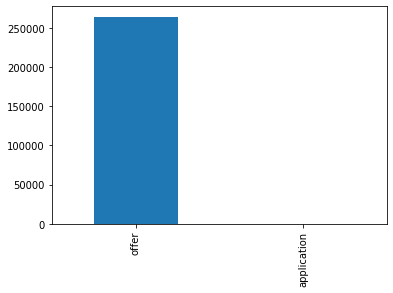

In [ ]:
print(df2['offerType'].value_counts(dropna = False))
df2['offerType'].value_counts(dropna = False).plot(kind = 'bar')

The data in this features seems extremely imbalanced. So we will consider dropping this feature.

### ABTEST

In [ ]:
df2['abtest'].describe()

count     264368
unique         2
top         test
freq      137172
Name: abtest, dtype: object

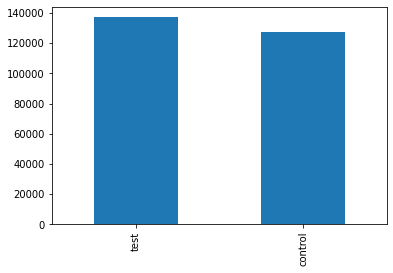

In [ ]:
df2['abtest'].value_counts(dropna = False).plot(kind = 'bar')

### Statistical Analysis
Is there any discrepancy in avg price with respect to abtest.

H0 : avg_price_test = avg_price_control

H1 : avg_price_test != avg_price_control

In [ ]:
price_test = df2.loc[df2['abtest'] == 'test','price']
price_control = df2.loc[df2['abtest'] == 'control','price']

Shapiro Test - Test for Normality

In [ ]:
print(shapiro(price_test))
print(shapiro(price_control))

(0.7027208805084229, 0.0)
(0.7039284110069275, 0.0)


The prices for cars with both test and control are not normally distributed as pvalue is less than 0.05.

Bartlett Test - Test for equal variance

In [ ]:
from scipy.stats import bartlett
print(bartlett(price_test,price_control))

BartlettResult(statistic=4.13776544873579, pvalue=0.041936493185995086)


The variance in price for car with control abtest is not equal to the car with test abtest as pvalue is less that 0.05. So for a non parametric independent 2 sample t-test we will go with manwhitneyu test.

Manwhitneyu Test

H0 : Average price of car with automatic gearbox is equal to average price of car with manual gearbox.

In [ ]:
from scipy.stats import mannwhitneyu
print(mannwhitneyu(price_test,price_control))

MannwhitneyuResult(statistic=8709574020.5, pvalue=0.23302577219290604)


We can see from the manwhitneyu test that the price of used car is not affected by the feature abtest as the pvalue is greater than 0.05. So we will prefer dropping this column.

### Year Of Registration

In [ ]:
df2['yearOfRegistration'].describe()

count    264368.000000
mean       2003.737873
std          14.635000
min        1600.000000
25%        2000.000000
50%        2004.000000
75%        2008.000000
max        6200.000000
Name: yearOfRegistration, dtype: float64

In [ ]:
df2.loc[(df2['yearOfRegistration']<1923) | (df2['yearOfRegistration']>2020),'yearOfRegistration'] = np.nan

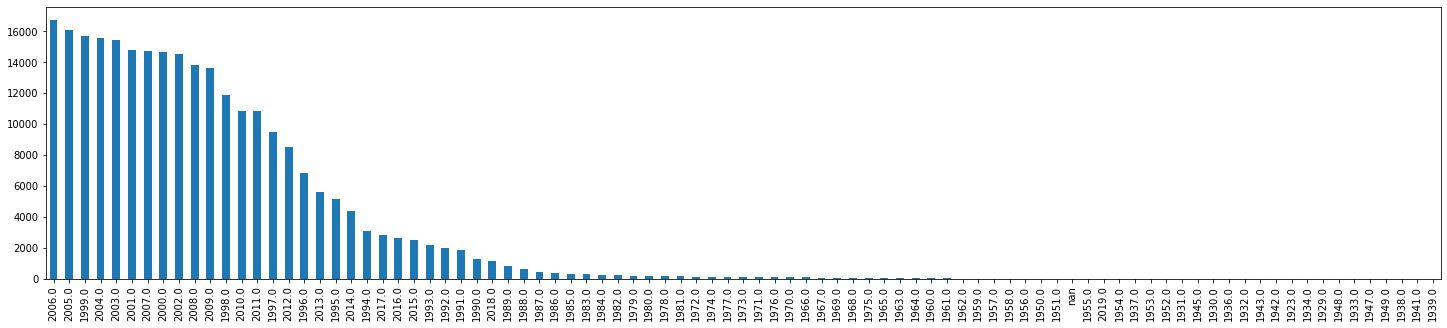

In [ ]:
plt.figure(figsize=(25,5))
df2['yearOfRegistration'].value_counts(dropna = False).plot(kind = 'bar')

In [ ]:
df2 = df2[df2['yearOfRegistration'].isnull() == False]

We will be combining this column with monthOfRegistration to convert it to the age of vehicle

### Power PS

In [ ]:
df2['powerPS'].describe()

count    264360.000000
mean        125.230837
std         145.023281
min           0.000000
25%          75.000000
50%         116.000000
75%         150.000000
max       20000.000000
Name: powerPS, dtype: float64

[[0.00000000e+00]
 [5.38318884e-02]
 [1.07663777e-01]
 ...
 [1.99998923e+04]
 [1.99999462e+04]
 [2.00000000e+04]]


Text(0.5, 1.0, 'Power PS')

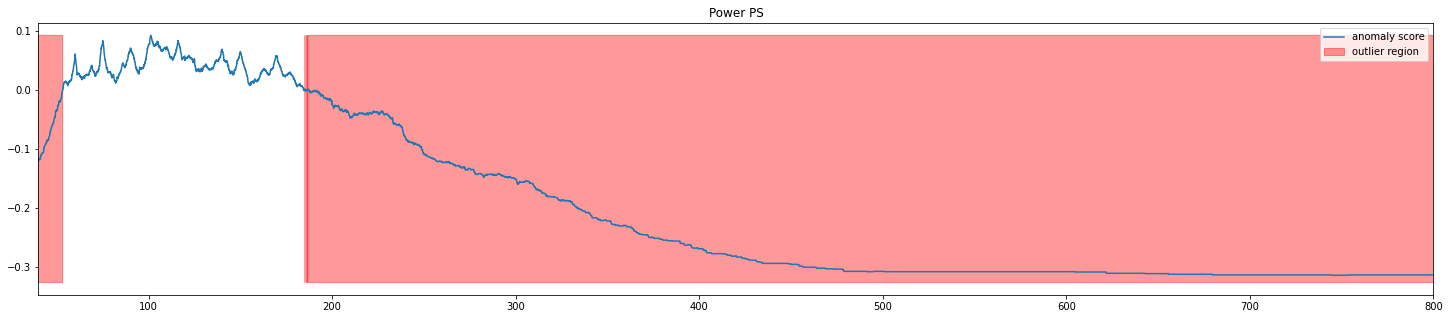

In [ ]:
isolation_forest = IsolationForest(contamination='auto')
isolation_forest.fit(df2['powerPS'].values.reshape(-1,1))

xx = np.linspace(df2['powerPS'].min(), df2['powerPS'].max(), len(df)).reshape(-1,1)
print(xx)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)

plt.figure(figsize=(25,5))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                     where=outlier==-1, color='r', 
                     alpha=.4, label='outlier region')
plt.legend()
plt.xlim(40, 800)
plt.title('Power PS')

In [ ]:
df2 = df2[(df2['powerPS']<800) & (df2['powerPS']>40)]

If we see from the above plot, almost all data point above 200 seems to come under outliers, but dropping all of those does not seem to be a feasible solution. We can also see that data points after 800 have consistently very low anamoly score, so we can go ahead and drop those data points, and the remaining outliers can be handled further using transformation techniques. Also data points with powerps below 40 also seem to be very low as far as powerps of a used car is concerned, so we will also drop those data points which have powerps below 40.

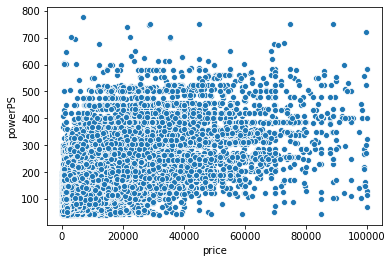

In [ ]:
sns.scatterplot(x = 'price', y = 'powerPS',data = df2)

In [ ]:
df2[['price','powerPS']].corr()

,price,powerPS
price,1.000000,0.593657
powerPS,0.593657,1.000000


### State

In [ ]:
df2['state'].describe()

count                  252120
unique                     16
top       Nordrhein-Westfalen
freq                    58788
Name: state, dtype: object

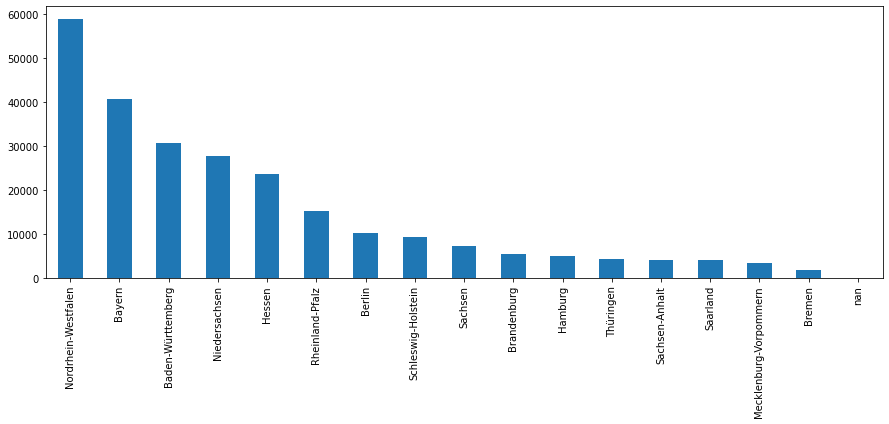

In [ ]:
plt.figure(figsize=(15,5))
df2['state'].value_counts(dropna = False).plot(kind = 'bar')

Imputation of the values for state does not really make sense because we will not be able to determine which state car belongs to by using other features in the dataset. So we will drop the NA values.

In [ ]:
df2 = df2[df2['state'].isnull() == False]

### Statistical Analysis
Is there any discrepancy in avg price with respect to brand.

H0 : avg_price_Nordrhein-Westfalen = avg_price_bayern = ..... = avg_price_bremen

H1 : avg_price_Nordrhein-Westfalen != avg_price_bayern != ..... != avg_price_bremen

In [ ]:
oneway_posthoc('state')

pvalue for state is 0.0

Avg price of car for state = Bayern is  8128.0733800565595
Avg price of car for state = Hessen is  7053.267379229086
Avg price of car for state = Nordrhein-Westfalen is  6292.6224059331835
Avg price of car for state = Rheinland-Pfalz is  6491.300355450237
Avg price of car for state = Sachsen is  5771.307639743064
Avg price of car for state = Baden-Württemberg is  7263.9294044624485
Avg price of car for state = Niedersachsen is  6548.555907666822
Avg price of car for state = Berlin is  6685.093308477237
Avg price of car for state = Sachsen-Anhalt is  5038.276153660305
Avg price of car for state = Mecklenburg-Vorpommern is  5084.016989567809
Avg price of car for state = Hamburg is  7054.450300601203
Avg price of car for state = Saarland is  6156.078078817734
Avg price of car for state = Thüringen is  5915.6894606183705
Avg price of car for state = Schleswig-Holstein is  5519.898975890762
Avg price of car for state = Brandenburg is  5567.724732353475
Avg price of 

We can see from the oneway test that the price of used car is affected by state as the pvalue is less than 0.05

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 16 Text major ticklabel objects>)

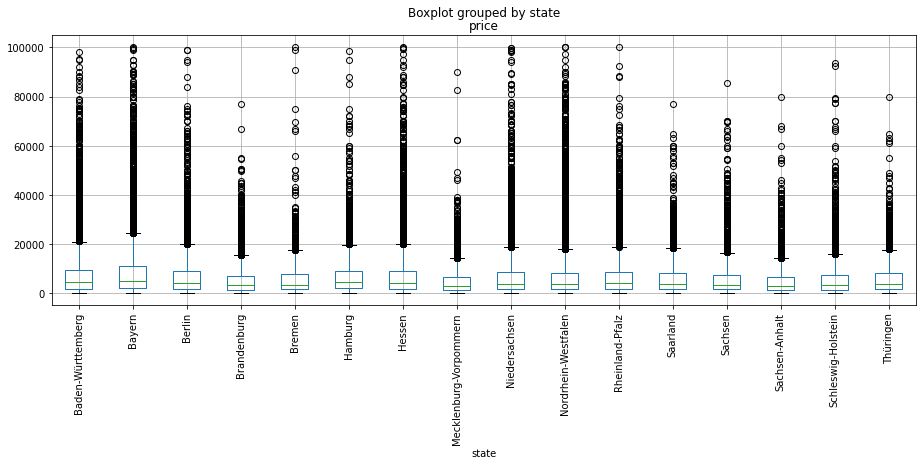

In [ ]:
df2.boxplot(column='price',by = 'state',figsize = (15,5))
plt.xticks(rotation = 90)

As we can see quite evidently that the average price of a used car varies significantly in different states.

### Country of manufacture

In [ ]:
df2['CountryOfManufacture'] = df2['brand']

df2['CountryOfManufacture'] = df2['CountryOfManufacture'].replace(['ford','chevrolet','chrysler','jeep'], 'USA')
df2['CountryOfManufacture'] = df2['CountryOfManufacture'].replace(['jaguar', 'land_rover', 'rover', 'mini'], 'UK')
df2['CountryOfManufacture'] = df2['CountryOfManufacture'].replace(['toyota', 'nissan', 'honda', 'subaru', 'mazda', 
                                                                   'mitsubishi','suzuki','daihatsu'], 'Japan')
df2['CountryOfManufacture'] = df2['CountryOfManufacture'].replace(['volkswagen', 'bmw', 'audi', 'mercedes_benz','opel',
                                                                   'porsche', 'smart','trabant'], 'Germany')
df2['CountryOfManufacture'] = df2['CountryOfManufacture'].replace(['hyundai', 'kia', 'daewoo'], 'Korea')
df2['CountryOfManufacture'] = df2['CountryOfManufacture'].replace(['volvo','saab'], 'Sweden')
df2['CountryOfManufacture'] = df2['CountryOfManufacture'].replace(['fiat', 'alfa_romeo', 'lancia', 'Ferrari'], 'Italy')
df2['CountryOfManufacture'] = df2['CountryOfManufacture'].replace(['skoda'],'Czech')
df2['CountryOfManufacture'] = df2['CountryOfManufacture'].replace(['peugeot','renault','citroen'],'France')
df2['CountryOfManufacture'] = df2['CountryOfManufacture'].replace('seat','Spain')
df2['CountryOfManufacture'] = df2['CountryOfManufacture'].replace('dacia','Romania')
df2['CountryOfManufacture'] = df2['CountryOfManufacture'].replace('lada','Russia')
df2['CountryOfManufacture'] = df2['CountryOfManufacture'].replace(['sonstige_autos'],'Others')

In [ ]:
df2['CountryOfManufacture'].describe()

count      252120
unique         12
top       Germany
freq       163193
Name: CountryOfManufacture, dtype: object

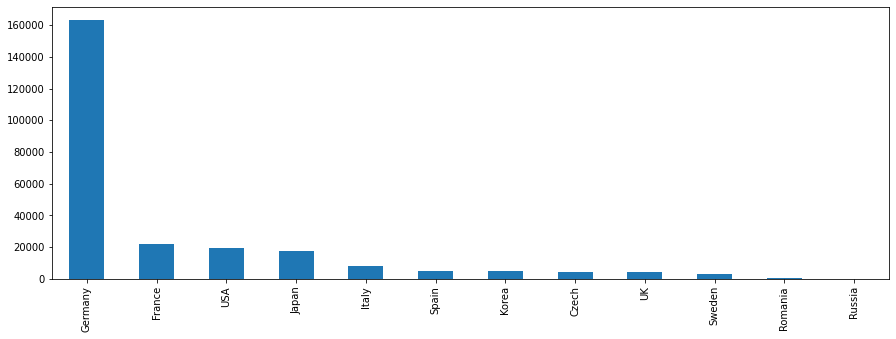

In [ ]:
plt.figure(figsize=(15,5))
df2['CountryOfManufacture'].value_counts(dropna = False).plot(kind = 'bar')

### Statistical Analysis
Is there any discrepancy in avg price with respect to country of manufacture.

H0 : avg_price_Germamy = avg_price_France = ..... = avg_price_Russia

H1 : avg_price_Germany != avg_price_France != ..... != avg_price_Russia

In [ ]:
oneway_posthoc('CountryOfManufacture')

pvalue for CountryOfManufacture is 0.0

Avg price of car for CountryOfManufacture = Germany is  7730.417376970826
Avg price of car for CountryOfManufacture = Czech is  7103.054254840162
Avg price of car for CountryOfManufacture = France is  3395.020343931031
Avg price of car for CountryOfManufacture = Japan is  4906.827564397424
Avg price of car for CountryOfManufacture = USA is  4809.280493422736
Avg price of car for CountryOfManufacture = Spain is  5216.342880193626
Avg price of car for CountryOfManufacture = Italy is  3714.9580891719747
Avg price of car for CountryOfManufacture = UK is  11383.986631654332
Avg price of car for CountryOfManufacture = Korea is  5950.564463484292
Avg price of car for CountryOfManufacture = Romania is  6070.954220314736
Avg price of car for CountryOfManufacture = Sweden is  5719.868203716449
Avg price of car for CountryOfManufacture = Russia is  3757.3333333333335


We can see from the oneway test that the price of used car is affected by country of manufacture as the pvalue is less than 0.05

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Text major ticklabel objects>)

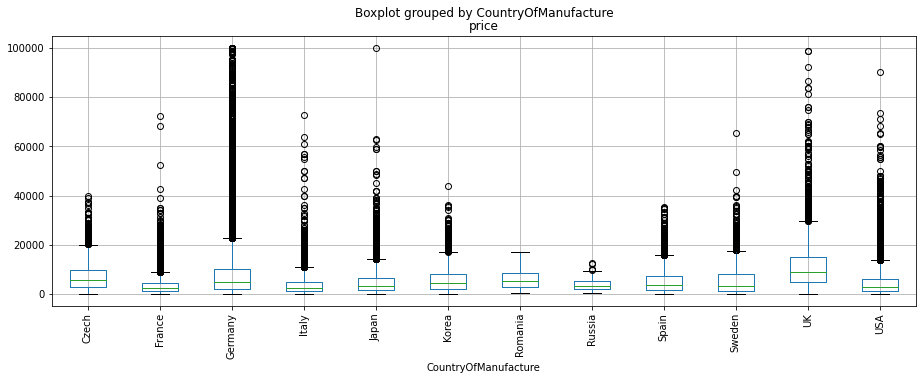

In [ ]:
df2.boxplot(column='price',by = 'CountryOfManufacture',figsize = (15,5))
plt.xticks(rotation = 90)

### Brand

In [ ]:
df2['brand'].describe()

count         252120
unique            39
top       volkswagen
freq           53167
Name: brand, dtype: object

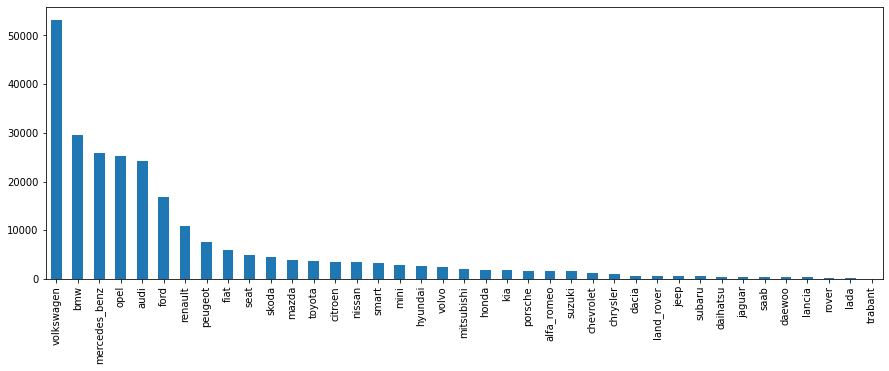

In [ ]:
plt.figure(figsize=(15,5))
df2['brand'].value_counts(dropna = False).plot(kind = 'bar')

### Statistical Analysis
Is there any discrepancy in avg price with respect to brand.

H0 : avg_price_volkswagen = avg_price_bmw = avg_price_mercedes_benz = ..... = avg_price_trabant

H1 : avg_price_volkswagen != avg_price_bmw != avg_price_mercedes_benz != ..... != avg_price_trabant

In [ ]:
oneway_posthoc('brand')

pvalue for brand is 0.0

Avg price of car for brand = volkswagen is  6278.570523068821
Avg price of car for brand = skoda is  7103.054254840162
Avg price of car for brand = bmw is  9337.721831462193
Avg price of car for brand = peugeot is  3726.857483759777
Avg price of car for brand = mazda is  4739.097828863346
Avg price of car for brand = nissan is  5533.942307692308
Avg price of car for brand = renault is  2935.152767595308
Avg price of car for brand = ford is  4364.515396113602
Avg price of car for brand = mercedes_benz is  9289.98163580247
Avg price of car for brand = opel is  3523.7646431112166
Avg price of car for brand = seat is  5216.342880193626
Avg price of car for brand = honda is  4556.207656004195
Avg price of car for brand = fiat is  3411.8916850875703
Avg price of car for brand = mini is  10383.375653993722
Avg price of car for brand = smart is  4061.285224438903
Avg price of car for brand = audi is  10190.79878299482
Avg price of car for brand = alfa_romeo is  4769.84

We can see from the oneway test that the price of used car is affected by brand as the pvalue is less than 0.05

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39]), <a list of 39 Text major ticklabel objects>)

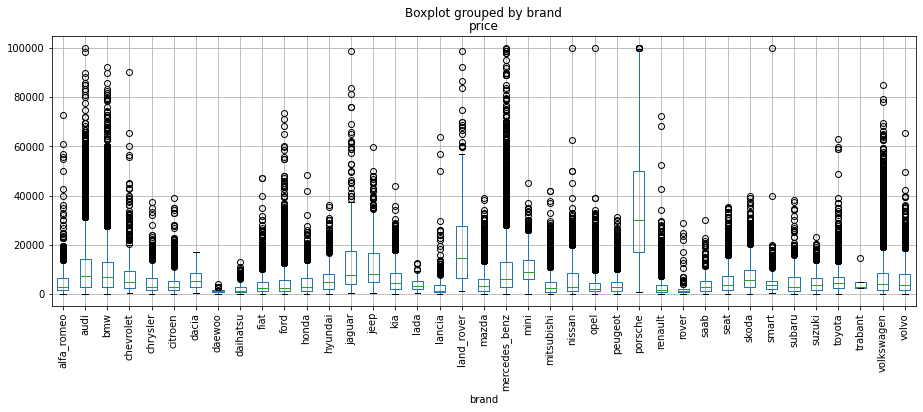

In [ ]:
df2.boxplot(column='price',by = 'brand',figsize = (15,5))
plt.xticks(rotation = 90)

As we can see quite evidently that the average price of a used car varies significantly for different brands of vehicles.

### Month Of Registration

In [ ]:
df2['monthOfRegistration'].describe()

count    252120.000000
mean          6.200198
std           3.458850
min           0.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          12.000000
Name: monthOfRegistration, dtype: float64

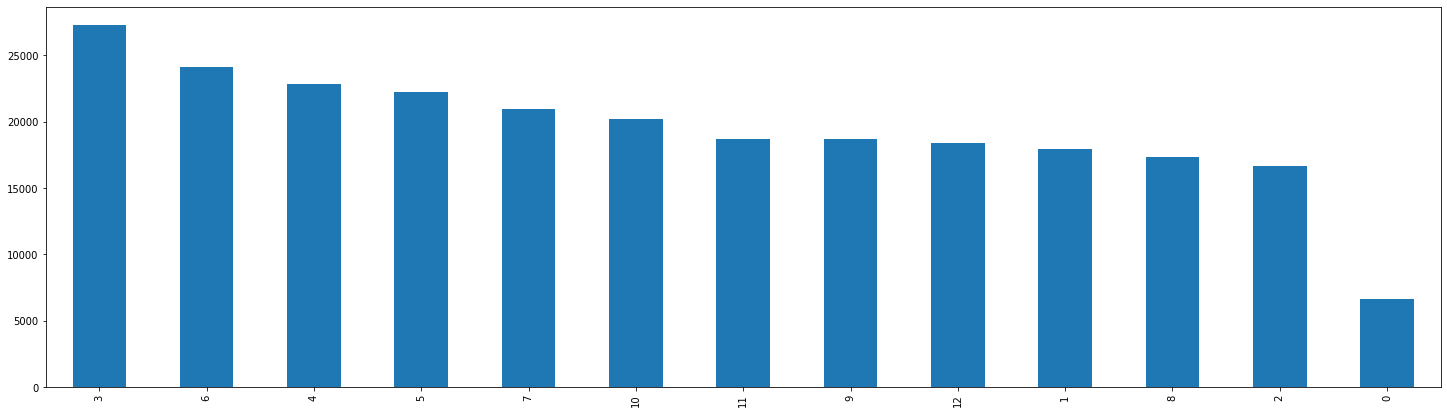

In [ ]:
plt.figure(figsize=(25,7))
df2['monthOfRegistration'].value_counts(dropna = False).plot(kind = 'bar')

In [ ]:
df2 = df2[df2['monthOfRegistration'] != 0]

We will be combining this column with yearOfRegistration to convert it to the age of vehicle

### Number of days online

In [ ]:
val = list(df2['lastSeen'] - df2['dateCreated'])
days = [obj.days for obj in val]
for i in range(len(days)):
  if days[i] < 0:
    days[i] = np.nan
df2['No_of_days_online'] = days

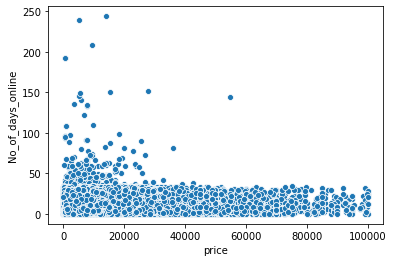

In [ ]:
sns.scatterplot(x = 'price', y = 'No_of_days_online',data = df2)

In [ ]:
df2[['price','No_of_days_online']].corr()

,price,No_of_days_online
price,1.000000,0.130044
No_of_days_online,0.130044,1.000000


### Age of Vehicle

In [ ]:
import datetime

def calculateAge(yr,mnth):
    today_date = datetime.datetime.today()
    years = today_date.year - yr
    month = today_date.month - mnth
    ageindecimal = years + month/12
    return round(ageindecimal,2)

In [ ]:
df2['ageOfVehicle'] = list(map(calculateAge,df2['yearOfRegistration'],df2['monthOfRegistration']))

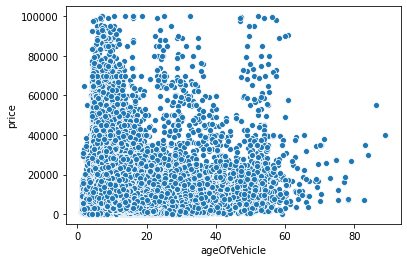

In [ ]:
sns.scatterplot(y = 'price', x = 'ageOfVehicle',data = df2)

In [ ]:
df2[['price','ageOfVehicle']].corr()

,price,ageOfVehicle
price,1.000000,-0.447361
ageOfVehicle,-0.447361,1.000000


## EDA

### Univariate Analysis

#### Price

<img src = 'https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Gr&#47;Group1EDA&#47;Price&#47;1.png'>

#### Power PS

<img src = 'https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Gr&#47;Group1EDA&#47;powerPS&#47;1.png' >

**Inference :**

| **Statistical Information** | **Price** | **powerPS** |
| --- | --- | --- |
| 25% (lower quartile) | 100 | 41 |
| 50% (Median – middle quartile) | 4000 | 4000 |
| 75% (upper quartile) | 19,800 | 19800 |
|Mean|	6846.65|	6846.65|

#### Age of vehicle

<img src = 'https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Gr&#47;Group1EDA&#47;ageOfVehicle&#47;1.png'>

#### Number of days online

<img src = 'https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Gr&#47;Group1EDA&#47;No_of_days_online&#47;1.png'>


**Inference :**

| **Statistical Information** | **ageOfVehicle** | **No\_of\_days\_online** |
| --- | --- | --- |
| 25% (lower quartile) | 1.08 | 0 |
| 50% (Median – middle quartile) | 15.75 | 7 |
| 75% (upper quartile) | 33 | 31 |
| Mean | 16.10 | 9.24 |

Price, powerPS, ageOfVehicle and No_of_days_online have outliers for which transformation technique will be applied to reduce the effect of outliers.

#### Count of Vehicle type

<img src ='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Gr&#47;Group1EDA&#47;CountofvehicleType&#47;1.png'>


#### Count of notRepairedDamage

<img src ='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Gr&#47;Group1EDA&#47;CountofnotRepairedDamage&#47;1.png'>

#### Count of Fuel type

<img src = 'https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Gr&#47;Group1EDA&#47;CountoffuelType&#47;1.png'>

### Bivariate Analysis

#### Price vs Fueltype

<img src = 'https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Gr&#47;Group1EDA&#47;PricevsfuelType&#47;1.png'>

**Inference:** Cars with different fuel type have different prices, from the plot we can see that cars of electric and hybrid fuel type are expensive as compared to other fuel types, Diesel and petrol fuel type cars belong to moderate range of price. CNG and LPG cars are the least expensive. The horizontal grey line shows the mean price of each fuel type cars, also p-value of fuel type is 0 when One-way ANOVA test was performed, hence fuel type of car becomes significant to predict price.

#### Price vs Gearbox

<img src = 'https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Gr&#47;Group1EDA&#47;Pricevsgearbox&#47;1.png'>

**Inference:** Cars with automatic gearbox are of higher prices as compared to cars with manual gearbox. Mean price of cars with automatic and manual gearbox are different, p-value of gearbox is 0 which indicates that it is a significant feature in price prediction.

#### Price v/s Vehicle type

<img src = 'https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Gr&#47;Group1EDA&#47;PricevsvehicleType&#47;1.png'>

**Inference:** SUV, coupe and convertible vehicle types comes under higher price ranges. The mean price difference between convertible and coupe; limousine and microbus is less hence for price prediction one may consider only one vehicle type among them, though here we have considered each vehicle type distinctly.

#### Price v/s Not Repaired Damage

<img src = 'https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Gr&#47;Group1EDA&#47;PricevsnotRepairedDamage&#47;1.png'>

**Inference:** Cars that do not have unrepaired damages have higher prices compared to the ones that have not repaired damages. Customers generally prefer cars in good condition over the ones that would bring about additional maintenance cost.

#### Average Price of brand

<img src = 'https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Gr&#47;Group1EDA&#47;Averagepriceofbrands&#47;1.png'> 

**Inference:** Porsche, land rover and jaguar top the brand list being the most expensive used cars.

#### Average price v/s kilometer

<img src = 'https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Gr&#47;Group1EDA&#47;Averagepricevskilometer&#47;1.png'>

**Inference:** Here, we have considered kilometer as a categorical feature against average price. As the kilometers driven increases, average price decreases, this could probably mean that customers are keen on buying used cars that are less driven and are relatively in good condition. Also, we can see the average price for 5000 km is less as compared to 10000 km, there could be three possible reasons:

1. The data does not comprise much information about used cars that are driven 5000 kilometers.
2. The cars might have some not be repaired damages; that would result in lower prices.
3. Fuel type and vehicle type could rank higher when it comes to used car price determination.

#### Price v/s Age of Vehicle

<img src = 'https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Gr&#47;Group1EDA&#47;PricevsageOfVehicle&#47;1.png'>

**Inference:** The trend line in the above scatter plot indicates a strong negative correlation between price and age of vehicle. Exceptions include Porsche, Land Rover, Mercedes Benz and BMW that belong to luxury cars, wherein even though the age of vehicle is greater than 40 years, price would be higher.

#### Price v/s PowerPS

<img src = 'https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Gr&#47;Group1EDA&#47;PricevspowerPS&#47;1.png'>

**Inference:** The above trend line shows a positive correlation between price and powerPS. Basic vehicle type like small cars and bus have less powerPS as compared to sport cars that has powerPS more than 300. Such high powerPS cars belongs to brands like Mercedes Benz, Porsche, BMW, Audi etc., that are well known for manufacturing sports cars.

#### Average powerPS v/s Brand

<img src = 'https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Gr&#47;Group1EDA&#47;AveragepowerPSvsbrand&#47;1.png'>

**Inference:** As we have seen in earlier plot between average price and brand; Porsche, Land Rover, Jaguar, Jeep, BMW are one of those brands whose average price is higher as compared to other brands. The bar plot between average price and powerPS also states same brands justifying the positive correlation between price and powerPS.

#### Average powerPS v/s Fuel type

<img src = 'https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Gr&#47;Group1EDA&#47;AveragepowerPsvsfuelType&#47;1.png'>

**Inference:** As Germany is more likely to ban diesel and petrol cars in the country by 2030, LPG and electric cars seems to be an efficient alternative in terms of powerPS performance, also LPG cars are the cheapest cars, this could be one of the main reason as customers are selling diesel and petrol cars, hence available in huge amount in dealer’s inventory.

#### Average powerPS v/s gearbox

<img src = 'https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Gr&#47;Group1EDA&#47;AveragepowerPSvsgearbox&#47;1.png'>

**Inference:** Cars with low power generally have manual gearbox, whereas, mid-range cars will have an equal number of manual and automatic gearboxes. Nowadays, in many high range cars, manufacturers prefer automatic gearboxes because only then they can achieve their said 0-100 speeds. Additionally, launch control and gear response time will be better in cars with automatic gearboxes.

#### Count of fueltype in terms of gearbox

<img src = 'https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Gr&#47;Group1EDA&#47;CountoffuelTypeintermsofgearbox&#47;1.png'>

#### Count of vehicleType in terms of fuelType

<img src = 'https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Gr&#47;Group1EDA&#47;CountofvehicleTypeintermsoffuelType&#47;1.png'>

#### Count of vehicleType in terms of gearbox

<img src = 'https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Gr&#47;Group1EDA&#47;CountofvehicleTypeintermsofgearbox&#47;1.png'>

#### Count of vehicleType in terms of notRepairedDamage

<img src ='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Gr&#47;Group1EDA&#47;CountofvehicleTypevsnotRepairedDamage&#47;1.png' >

### Multivariate Analysis

#### Price, vehicleType and gearbox

<img src = 'https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Gr&#47;Group1EDA&#47;PricevsvehicleTypevsgearbox&#47;1.png'>

**Inference:** As we have seen earlier in the plot between price and vehicle type; SUV, convertible and coupe are of higher prices as compared to other vehicle types; when compared in terms of gearbox we get the same results in both automatic and manual gearboxes. Thus in general, SUV, convertible and coupe are of higher prices irrespective of gearbox.

#### Price, fuelType and gearbox

<img src = 'https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Gr&#47;Group1EDA&#47;PricevsfuelTypevsgearbox&#47;1.png'>

**Inference:** Box plot between price and fuel type stated that the electric and hybrid fuel type cars belong to higher price ranges. But when compared in terms of gearbox, diesel cars are as expensive as electric and hybrid for automatic gearbox; while for manual gearbox, electric cars are of lesser price as compared to diesel and hybrid cars. Hence, gearbox plays a major role for selecting cars in terms of fuel type.

## Finalizing features depending on EDA

In [ ]:
df3 = df2[['kilometer','notRepairedDamage', 'vehicleType', 'fuelType', 'gearbox', 'ageOfVehicle', 'model', 'brand', 'powerPS', 'No_of_days_online', 'state','CountryOfManufacture','price']]

In [ ]:
df3.head()

,kilometer,notRepairedDamage,vehicleType,fuelType,gearbox,ageOfVehicle,model,brand,powerPS,No_of_days_online,state,CountryOfManufacture,price
3,150000,No,small car,petrol,manual,19.00,golf,volkswagen,75,0,Bayern,Germany,1500
4,90000,No,small car,diesel,manual,11.92,fabia,skoda,69,6,Hessen,Czech,3600
5,150000,Yes,limousine,petrol,manual,24.67,3s,bmw,102,2,Nordrhein-Westfalen,Germany,650
6,150000,No,convertible,petrol,manual,15.83,2series,peugeot,109,4,Rheinland-Pfalz,France,2200
10,150000,No,limousine,petrol,manual,15.50,3series,mazda,105,11,Bayern,Japan,2000


In [ ]:
get_missing_val_count_df(df3)

,count
vehicleType,4607
kilometer,0
notRepairedDamage,0
fuelType,0
gearbox,0
ageOfVehicle,0
model,0
brand,0
powerPS,0
No_of_days_online,0


## Imputation of vehicle type

In [ ]:
# cat_cols = ['notRepairedDamage', 'vehicleType', 'fuelType', 'gearbox', 'model', 'brand']
cat_cols = ['vehicleType', 'model', 'brand']

Using model, brand and price to impute missing values of vehicle type.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_enc_dict = {}
for col_name in cat_cols:
  ordinal_enc_dict[col_name] = OrdinalEncoder()
  col = df3[col_name]
  col_not_null = col[col.notnull()]
  reshaped_vals = col_not_null.values.reshape(-1, 1)
  encoded_vals = ordinal_enc_dict[col_name].fit_transform(reshaped_vals)
  df3.loc[col.notnull(), col_name] = np.squeeze(encoded_vals)

In [ ]:
from sklearn.impute import KNNImputer
KNN_imputer = KNNImputer(n_neighbors=20)
df3_KNN = df3[['vehicleType', 'model', 'brand','price']].copy(deep=True)
df3_KNN.iloc[:, :] = np.round(KNN_imputer.fit_transform(df3_KNN))

In [ ]:
for col in cat_cols:
    reshaped_col = df3_KNN[col].values.reshape(-1, 1)
    df3_KNN[col] = ordinal_enc_dict[col].inverse_transform(reshaped_col)

In [ ]:
df_final = df3.copy(deep=True)

In [ ]:
df_final.loc[:,cat_cols] = df3_KNN[cat_cols]

In [ ]:
df_final.reset_index(drop=True)

,kilometer,notRepairedDamage,vehicleType,fuelType,gearbox,ageOfVehicle,model,brand,powerPS,No_of_days_online,state,CountryOfManufacture,price
0,150000,No,small car,petrol,manual,19.00,golf,volkswagen,75,0,Bayern,Germany,1500
1,90000,No,small car,diesel,manual,11.92,fabia,skoda,69,6,Hessen,Czech,3600
2,150000,Yes,limousine,petrol,manual,24.67,3s,bmw,102,2,Nordrhein-Westfalen,Germany,650
3,150000,No,convertible,petrol,manual,15.83,2series,peugeot,109,4,Rheinland-Pfalz,France,2200
4,150000,No,limousine,petrol,manual,15.50,3series,mazda,105,11,Bayern,Japan,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245495,150000,No,limousine,diesel,manual,9.92,golf,volkswagen,140,5,Baden-Württemberg,Germany,7900
245496,150000,Yes,limousine,petrol,manual,16.08,leon,seat,225,0,Bayern,Spain,3200
245497,125000,No,convertible,petrol,automatic,20.25,fortwo,smart,101,6,Niedersachsen,Germany,1199
245498,150000,No,bus,diesel,manual,24.25,transporter,volkswagen,102,19,Bayern,Germany,9200


In [ ]:
get_missing_val_count_df(df_final)

,count
kilometer,0
notRepairedDamage,0
vehicleType,0
fuelType,0
gearbox,0
ageOfVehicle,0
model,0
brand,0
powerPS,0
No_of_days_online,0


In [ ]:
df_final.head()

,kilometer,notRepairedDamage,vehicleType,fuelType,gearbox,ageOfVehicle,model,brand,powerPS,No_of_days_online,state,CountryOfManufacture,price
3,150000,No,small car,petrol,manual,19.00,golf,volkswagen,75,0,Bayern,Germany,1500
4,90000,No,small car,diesel,manual,11.92,fabia,skoda,69,6,Hessen,Czech,3600
5,150000,Yes,limousine,petrol,manual,24.67,3s,bmw,102,2,Nordrhein-Westfalen,Germany,650
6,150000,No,convertible,petrol,manual,15.83,2series,peugeot,109,4,Rheinland-Pfalz,France,2200
10,150000,No,limousine,petrol,manual,15.50,3series,mazda,105,11,Bayern,Japan,2000


## Encoding

In [ ]:
# pip install feature-engine

In [ ]:
X = df_final.drop(columns=['price'])
y = df_final.price

In [ ]:
X['kilometer'] = X['kilometer'].astype('O')
#X['postalCode'] = X['postalCode'].astype('O')

In [ ]:
X['kilometer'].nunique()

13

In [ ]:
cat_cols = ['kilometer','notRepairedDamage','vehicleType','fuelType','gearbox','model', 'brand','state','CountryOfManufacture']
num_cols = ['powerPS' ,'ageOfVehicle','No_of_days_online']

In [ ]:
cat_cols_high_crdnlty = []
cat_cols_low_crdnlty = []

for i in cat_cols:
    if X[i].nunique()>5:
        cat_cols_high_crdnlty.append(i)
    else:
        cat_cols_low_crdnlty.append(i)
print(cat_cols_high_crdnlty)
print(cat_cols_low_crdnlty)

['kilometer', 'vehicleType', 'fuelType', 'model', 'brand', 'state', 'CountryOfManufacture']
['notRepairedDamage', 'gearbox']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.25 , random_state = 123)

#### PURE ONE HOT ENCODING

In [ ]:
def OHE(df):
    df_OHE = pd.concat([df[num_cols], pd.get_dummies(df[cat_cols], drop_first=True)],axis=1)
    return df_OHE

In [ ]:
X_train_OHE = OHE(X_train)
X_test_OHE = OHE(X_test)
#X_test_OHE.head()

#### OHE - COUNT ENCODING

In [ ]:
def categorical_to_counts(df_train, df_test):
    #df copy
    df_train_temp = df_train.copy()
    df_test_temp = df_test.copy()
    for col in cat_cols_high_crdnlty:
        counts_map = df_train_temp[col].value_counts().to_dict()
        df_train_temp[col] = df_train_temp[col].map(counts_map)
        df_test_temp[col] = df_test_temp[col].map(counts_map)
    df_train_temp = pd.concat([df_train_temp, pd.get_dummies(df_train_temp[cat_cols_low_crdnlty], drop_first=True)],axis=1)
    df_test_temp = pd.concat([df_test_temp, pd.get_dummies(df_test_temp[cat_cols_low_crdnlty], drop_first=True)],axis=1)
    df_train_temp.drop(cat_cols_low_crdnlty,axis = 1, inplace = True)
    df_test_temp.drop(cat_cols_low_crdnlty,axis = 1, inplace = True)
#     df_train_temp[cat_cols_low_crdnlty] = pd.get_dummies(df_train_temp[cat_cols_low_crdnlty], drop_first=True)
#     df_test_temp[cat_cols_low_crdnlty] = pd.get_dummies(df_test_temp[cat_cols_low_crdnlty], drop_first=True)
    return df_train_temp, df_test_temp

X_train_count, X_test_count = categorical_to_counts(X_train, X_test)
X_test_count.head()

,kilometer,vehicleType,fuelType,ageOfVehicle,model,brand,powerPS,No_of_days_online,state,CountryOfManufacture,notRepairedDamage_Yes,gearbox_manual
300660,4619,8567,117949,7.83,632,38647,179,23,11091,119161,0,0
179258,8699,17663,117949,17.00,614,18400,87,4,29881,119161,0,1
33320,112287,38166,117949,13.00,4895,19018,163,22,22396,119161,0,1
115736,112287,13242,117949,12.17,5428,18400,140,7,22396,119161,0,1
91983,112287,54705,117949,17.00,2284,19018,82,2,17392,119161,0,1


In [ ]:
# from feature_engine.categorical_encoders import CountFrequencyCategoricalEncoder

# def counts(df_train, df_test):
#     count_enc = CountFrequencyCategoricalEncoder(encoding_method='count',variables=cat_cols)
#     count_enc.fit(df_train)
#     return count_enc.transform(df_train) , count_enc.transform(df_test)

In [ ]:
# X_train_count, X_test_count = counts(X_train, X_test)
# #X_test_count.head()

#### OHE - FREQUENCY ENCODING

In [ ]:
def categorical_to_freq(df_train, df_test):
    #df copy
    df_train_temp = df_train.copy()
    df_test_temp = df_test.copy()
    for col in cat_cols_high_crdnlty:
        freq_map = (df_train_temp.groupby([col]).size()/len(df_train_temp)).to_dict()
        df_train_temp[col] = df_train_temp[col].map(freq_map)
        df_test_temp[col] = df_test_temp[col].map(freq_map)
    df_train_temp = pd.concat([df_train_temp, pd.get_dummies(df_train_temp[cat_cols_low_crdnlty], drop_first=True)],axis=1)
    df_test_temp = pd.concat([df_test_temp, pd.get_dummies(df_test_temp[cat_cols_low_crdnlty], drop_first=True)],axis=1)
    df_train_temp.drop(cat_cols_low_crdnlty,axis = 1, inplace = True)
    df_test_temp.drop(cat_cols_low_crdnlty,axis = 1, inplace = True)
    return df_train_temp, df_test_temp

X_train_freq, X_test_freq = categorical_to_freq(X_train, X_test)
X_test_freq.head()

,kilometer,vehicleType,fuelType,ageOfVehicle,model,brand,powerPS,No_of_days_online,state,CountryOfManufacture,notRepairedDamage_Yes,gearbox_manual
300660,0.025086,0.046528,0.640592,7.83,0.003432,0.209895,179,23,0.060236,0.647174,0,0
179258,0.047245,0.095929,0.640592,17.00,0.003335,0.099932,87,4,0.162286,0.647174,0,1
33320,0.609841,0.207283,0.640592,13.00,0.026585,0.103289,163,22,0.121635,0.647174,0,1
115736,0.609841,0.071919,0.640592,12.17,0.029480,0.099932,140,7,0.121635,0.647174,0,1
91983,0.609841,0.297108,0.640592,17.00,0.012405,0.103289,82,2,0.094458,0.647174,0,1


In [ ]:
# def frequency(df_train, df_test):
#     freq_enc = CountFrequencyCategoricalEncoder(encoding_method='frequency',variables=cat_cols)
#     freq_enc.fit(df_train)
#     return freq_enc.transform(df_train) , freq_enc.transform(df_test)

In [ ]:
# X_train_freq, X_test_freq = frequency(X_train, X_test)
# #X_test_freq.head()

#### OHE - MEAN ENCODING

In [ ]:
def cat_to_mean(df_train, df_test, y_train, y_test):
    df_train_temp = pd.concat([df_train, y_train], axis=1).copy()
    df_test_temp = df_test

    for col in cat_cols_high_crdnlty:
        ordered_labels = df_train_temp.groupby([col])['price'].mean().to_dict()
        # Mapping
        df_train_temp[col] = df_train[col].map(ordered_labels)
        df_test_temp[col] = df_test[col].map(ordered_labels)

    # remove the target
    df_train_temp.drop(['price'], axis=1, inplace=True)
    df_train_temp = pd.concat([df_train_temp, pd.get_dummies(df_train_temp[cat_cols_low_crdnlty], drop_first=True)],axis=1)
    df_test_temp = pd.concat([df_test_temp, pd.get_dummies(df_test_temp[cat_cols_low_crdnlty], drop_first=True)],axis=1)
    df_train_temp.drop(cat_cols_low_crdnlty,axis = 1, inplace = True)
    df_test_temp.drop(cat_cols_low_crdnlty,axis = 1, inplace = True)
    return df_train_temp, df_test_temp


X_train_mean, X_test_mean = cat_to_mean(
    X_train, X_test, y_train, y_test)

X_test_mean.head()

,kilometer,vehicleType,fuelType,ageOfVehicle,model,brand,powerPS,No_of_days_online,state,CountryOfManufacture,notRepairedDamage_Yes,gearbox_manual
300660,13929.010175,14067.443212,5519.481539,7.83,17594.710443,6370.807618,179,23,6545.231990,7851.061497,0,0
179258,8604.209909,7252.142445,5519.481539,17.00,4910.013029,3620.366196,87,4,8261.462468,7851.061497,0,1
33320,4377.040619,6561.915894,5519.481539,13.00,7777.844944,9352.747187,163,22,7339.684944,7851.061497,0,1
115736,4377.040619,10706.842471,5519.481539,12.17,3743.708917,3620.366196,140,7,7339.684944,7851.061497,0,1
91983,4377.040619,6639.592871,5519.481539,17.00,4822.957968,9352.747187,82,2,7118.440950,7851.061497,0,1


In [ ]:
# from feature_engine.categorical_encoders import MeanCategoricalEncoder

# def mean_enc(df_train,df_target,df_test):
#     mean_enc = MeanCategoricalEncoder(variables=cat_cols)
#     mean_enc.fit(df_train,df_target)
#     return mean_enc.transform(df_train) , mean_enc.transform(df_test)

In [ ]:
# X_train_mean, X_test_mean = frequency(X_train, X_test)
# #X_test_mean.head()

#### K-Fold Target Encoding

In [ ]:
from sklearn.model_selection import KFold

#train1,test1=train_test_split(df_final,test_size=0.2,stratify = df_final.model,random_state=321)
train1,test1=train_test_split(df_final,test_size=0.2,random_state=321)

def k_fold_target(train,test,columns,target,folds=5):
    train2 = train
    for column in columns:
        for i,j in KFold(n_splits=folds).split(train):
            mean=train.loc[train.index[i]].groupby(column)[target].mean()
            train.loc[train.index[j],column+'_Enc']=train.loc[train.index[j],column].map(mean)
        test[column+'_Enc']=test[column].map(train.groupby(column)[target].mean())
        train2[column+'_Enc']=train2[column].map(train.groupby(column)[target].mean())
        train = train.drop(column,axis=1)
        train2  = train2.drop(column,axis=1) 
        test  = test.drop(column,axis=1) 
    return train2,test

In [ ]:
# cat_cols.append('postalCode')
train_kte , test_kte = k_fold_target(train1,test1,cat_cols_high_crdnlty,'price')
# train_kte.drop('postalCode',axis = 1,inplace = True)
# test_kte.drop('postalCode',axis = 1,inplace = True)
train_kte = pd.concat([train_kte, pd.get_dummies(train_kte[cat_cols_low_crdnlty], drop_first=True)],axis=1)
test_kte = pd.concat([test_kte, pd.get_dummies(test_kte[cat_cols_low_crdnlty], drop_first=True)],axis=1)
train_kte.drop(cat_cols_low_crdnlty,axis = 1, inplace = True)
test_kte.drop(cat_cols_low_crdnlty,axis = 1, inplace = True)
train_kte.head()
test_kte.head()

,ageOfVehicle,powerPS,No_of_days_online,price,kilometer_Enc,vehicleType_Enc,fuelType_Enc,model_Enc,brand_Enc,state_Enc,CountryOfManufacture_Enc,notRepairedDamage_Yes,gearbox_manual
33643,22.25,90,4,120,4377.947369,11396.045274,5521.009096,7836.863228,4082.657025,6391.086711,3439.892074,1,1
3034,19.08,179,18,8990,8529.411508,11396.045274,5521.009096,14227.508639,10328.323066,6391.086711,7837.621484,0,1
38578,16.75,135,0,950,4377.947369,6546.599250,5521.009096,2693.171053,2989.713571,5578.958919,3439.892074,0,0
262879,17.00,75,0,2100,4377.947369,3296.976200,5521.009096,2460.237368,3580.063354,8181.189908,7837.621484,0,1
370376,20.75,99,10,750,4377.947369,6546.599250,5521.009096,1573.743119,5630.500000,6391.086711,4968.333211,0,1


In [ ]:
y_train = np.log1p(y_train)

In [ ]:
train_kte.dropna(inplace=True)

#### Choosing best encoding methods

In [ ]:
from sklearn.linear_model import LinearRegression , LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold , cross_val_score , cross_validate
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler

In [ ]:
res = []
def eval(Enc,X,y):
    for i in (LinearRegression() , LassoCV() , RandomForestRegressor(max_depth=4,n_jobs=-1) , KNeighborsRegressor()):
        scoring = {'r2':'r2' , 
                   'Neg_RMSE' : 'neg_root_mean_squared_error'}
        kfold = KFold(n_splits=5, random_state=3)
        n = len(list(kfold.split(X))[0][1])
        p = len(X.columns)
        if isinstance(i,KNeighborsRegressor):
            ss = StandardScaler()
            X_scaled = ss.fit_transform(X)
            results = cross_validate(i, X_scaled, y, cv=kfold, scoring=scoring)
        else:
            results = cross_validate(i, X, y, cv=kfold, scoring=scoring)
        res1 = results['test_r2']
        res1 = list(map(lambda x : 1 - (1-x) * (n-1)/(n-p-1),res1))
        #res.append((Enc,str(i).split('(')[0],'r2',np.mean(results['test_r2']),np.std(results['test_r2'])))
        res.append((Enc,str(i).split('(')[0],'Adj_r2',np.mean(res1),np.std(res1)))
        res.append((Enc,str(i).split('(')[0],'Neg_RMSE',np.mean(results['test_Neg_RMSE']),np.std(results['test_Neg_RMSE'])))

In [ ]:
from tqdm import tqdm_notebook as tqdm
for i,j,k in tqdm((('OHE',X_train_OHE,y_train),('Count Encoding',X_train_count,y_train),('Frequency Encoding',X_train_freq,y_train),
             ('Mean Encoding',X_train_mean,y_train),('K Fold Target Encoding',train_kte.drop(columns='price'),np.log1p(train_kte['price'])))):
    eval(i,j,k)

score = pd.DataFrame(res,columns=['Encoding','Algorithm','Scoring','Bias','Var'])
score.to_csv('scores_encoding.csv',index=False)

s1 = score
s1['Bias'] = s1['Bias'].round(4)
s1['Var']  = s1['Var'].round(4)
s1['Scores'] = s1['Bias'].astype('str') +' (+/-'+ s1['Var'].astype('str')+')'
s1.drop(columns=['Bias','Var'],inplace=True)
s1.set_index(['Algorithm','Encoding','Scoring']).unstack('Algorithm')

Scores  ...                      
Algorithm                        KNeighborsRegressor  ... RandomForestRegressor
Encoding               Scoring                        ...                      
Count Encoding         Adj_r2     0.8304 (+/-0.0032)  ...    0.7231 (+/-0.0053)
                       Neg_RMSE  -0.4638 (+/-0.0036)  ...   -0.5925 (+/-0.0053)
Frequency Encoding     Adj_r2     0.8304 (+/-0.0032)  ...    0.7222 (+/-0.0055)
                       Neg_RMSE  -0.4638 (+/-0.0036)  ...   -0.5935 (+/-0.0056)
K Fold Target Encoding Adj_r2     0.8481 (+/-0.0013)  ...     0.731 (+/-0.0018)
                       Neg_RMSE  -0.4385 (+/-0.0021)  ...   -0.5836 (+/-0.0029)
Mean Encoding          Adj_r2     0.8483 (+/-0.0016)  ...    0.7327 (+/-0.0037)
                       Neg_RMSE  -0.4386 (+/-0.0015)  ...    -0.5822 (+/-0.004)
OHE                    Adj_r2     0.7399 (+/-0.0031)  ...     0.7109 (+/-0.007)
                       Neg_RMSE  -0.5717 (+/-0.0024)  ...   -0.6027 (+/-0.0067)

[10 rows x 4 columns]

## Assumptions For linear Regression

#### Base OLS Model

In [ ]:
import statsmodels.api as sm

X = train_kte.drop(columns='price')
y = np.log1p(train_kte['price'])

X_constant = sm.add_constant(X)
lr = sm.OLS(y,X_constant).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                 4.416e+04
Date:                Tue, 30 Jun 2020   Prob (F-statistic):               0.00
Time:                        07:48:44   Log-Likelihood:            -1.7343e+05
No. Observations:              196400   AIC:                         3.469e+05
Df Residuals:                  196387   BIC:                         3.470e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        6.1289      0.016    374.992      0.000       6.097       6.161
ageOfVehicle                -0.0541      0.000   -216.670      0.000      -0.055      -0.054
powerPS                      0.0054   3.02e-05    179.431      0.000       0.005       0.005
No_of_days_online            0.0084      0.000     55.053      0.000       0.008       0.009
kilometer_Enc             8.436e-05   4.01e-07    210.457      0.000    8.36e-05    8.51e-05
vehicleType_Enc           3.884e-05   5.74e-07     67.652      0.000    3.77e-05       4e-05
fuelType_Enc              9.304e-05   7.89e-07    117.883      0.000    9.15e-05    9.46e-05
model_Enc                 3.224e-05   4.18e-07     77.064      0.000    3.14e-05    3.31e-05
brand_Enc                 1.203e-05    5.6e-07     21.472      0.000    1.09e-05    1.31e-05
state_Enc                 2.429e-05   1.71e-06     14.177      0.000    2.09e-05    2.76e-05
CountryOfManufacture_Enc  5.374e-05   8.91e-07     60.283      0.000     5.2e-05    5.55e-05
notRepairedDamage_Yes       -0.6978      0.005   -153.160      0.000      -0.707      -0.689
gearbox_manual              -0.0307      0.004     -8.632      0.000      -0.038      -0.024
==============================================================================
Omnibus:                    24814.913   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           279572.261
Skew:                          -0.145   Prob(JB):                         0.00
Kurtosis:                       8.838   Cond. No.                     2.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Asssumption 1 No Auto correlation.

##### Durbin Watson Test : 

In [ ]:
from statsmodels.stats.stattools import durbin_watson
print('Durbin Watson value : ',durbin_watson(lr.resid))

Durbin Watson value :  2.0044281895803864


Since Durbin Watson is in the acceptance range (1.5 - 2.5) we can conclude that there is no Auto correlation 

##### ACF Plot : 

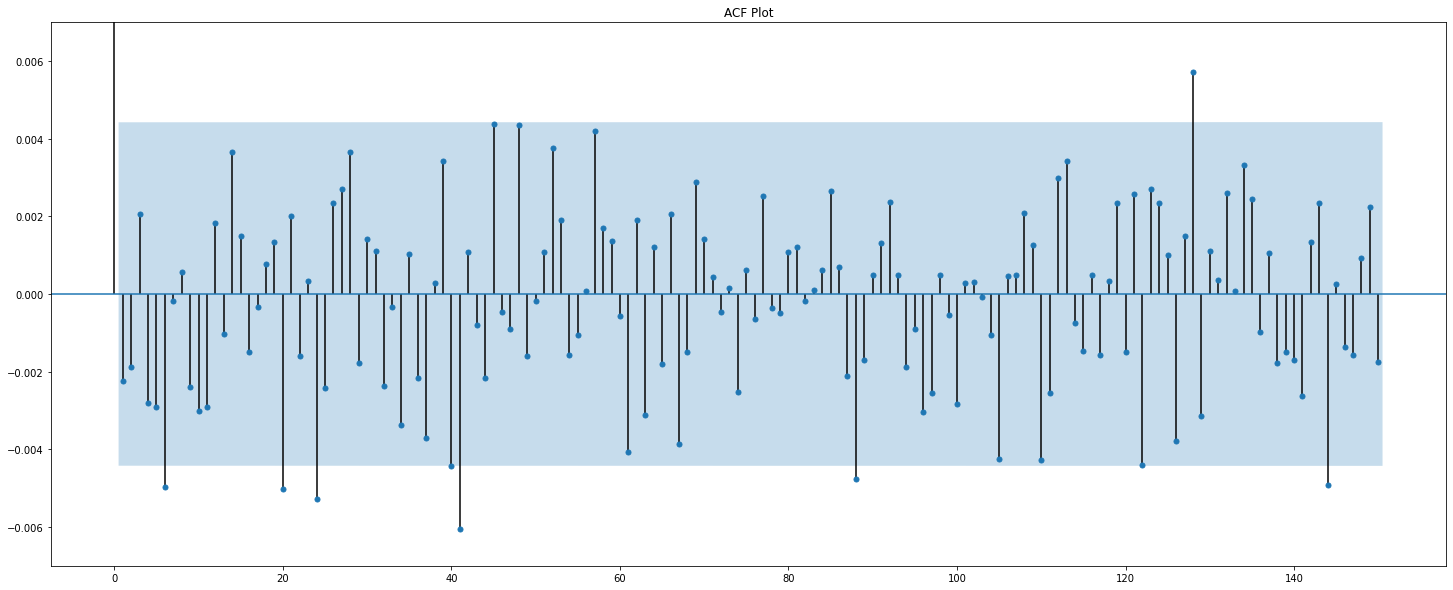

In [ ]:
import statsmodels.tsa.api as smt

fig , ax = plt.subplots(figsize=(25, 10))
ax.set_ylim([-0.007,0.007])
acf = smt.graphics.plot_acf(lr.resid,lags=150, alpha=0.05 , ax = ax)
plt.title('ACF Plot')
acf.show()

ACF plot confirms that there is no auto correlation

#### Assumption 2- Normality of Residuals

###### Jarque Bera test

Ho - Errors are normally distributed

Ha - Errors are not normally distributed

In [ ]:
from scipy import stats
jb_val , pval = stats.jarque_bera(lr.resid)
print('P value for Jarque Bera test is ',pval)
print('Test statistic value for Jarque Bera test is',jb_val)

P value for Jarque Bera test is  0.0
Test statistic value for Jarque Bera test is 279572.26074348326


In [ ]:
#test critical
stats.chi2.isf(0.05, df=2)

5.991464547107983

In this case the computed value of the JB statistic 279727.82 is greater than 5.99. Thus we reject the null hypothesis that the error terms are normally distributed.

##### QQ Plot

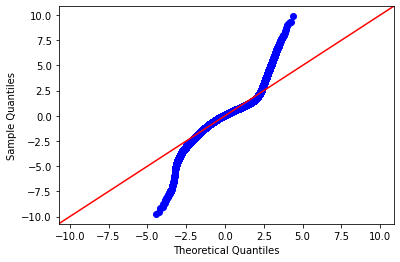

In [ ]:
fig = sm.qqplot(lr.resid,fit=True,line='45')

From QQ plot and Jarque Bera test we can conclude that residuals are not normal

#### Asssumption 3 - Linearity of residuals

##### Linear Rainbow test

Ho - Fit of the model using full sample is the same as using a central subset.

Ha - Fit of the model using full sample is the different as using a central subset.

In [ ]:
fstat , pval = sm.stats.diagnostic.linear_rainbow(res=lr, frac=0.5)
print('Pvalue for Linear rainbow test is ',np.round(pval,3))

Pvalue for Linear rainbow test is  0.407


Here since the P value is greater than 0.05 (significance level) we failed to reject the null hypothesis. Hence we can that conclude our data is linear

##### Visual check for linearity

[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'Predicted')]

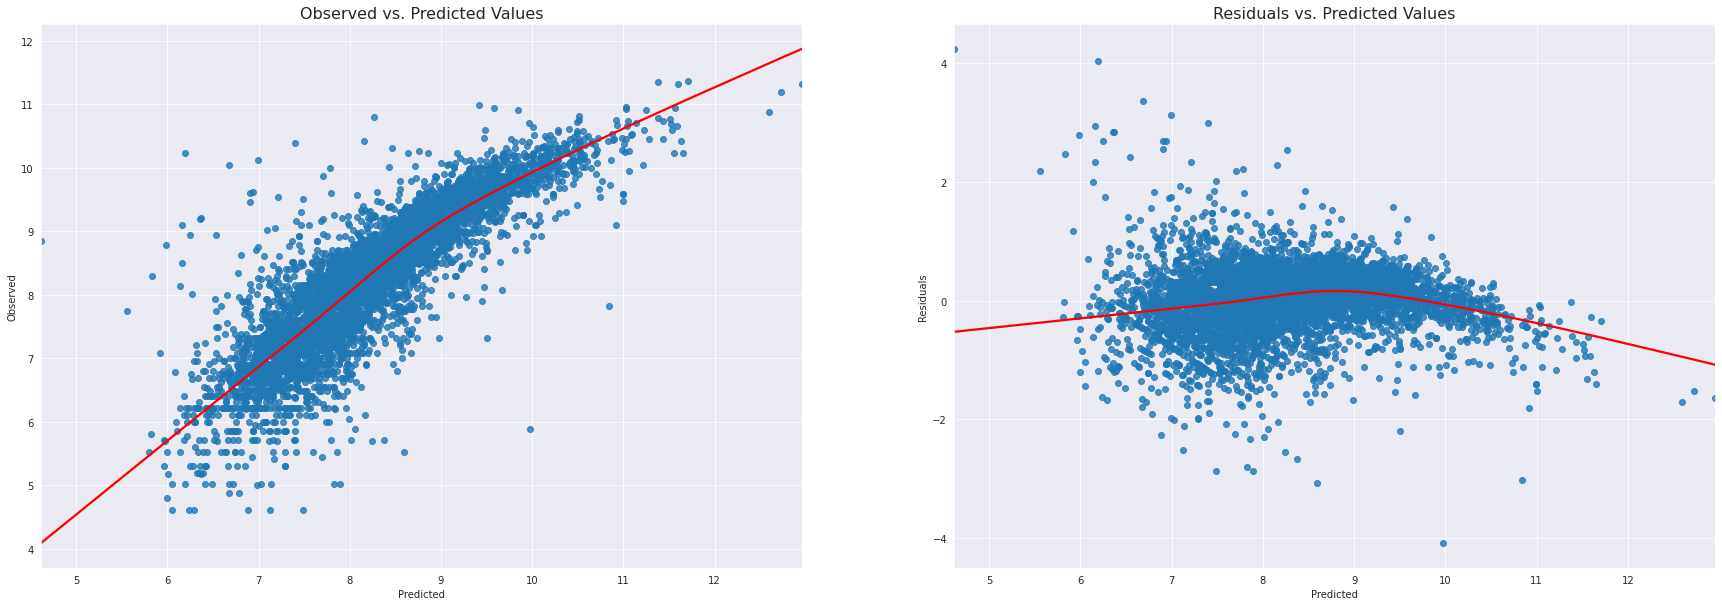

In [ ]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(1,2,figsize = (30,10))

predicted = lr.predict()[:5000]
resid = lr.resid[:5000]

sns.regplot(x=predicted, y=y[:5000], lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
ax[0].set(xlabel='Predicted', ylabel='Observed')

sns.regplot(x=predicted, y=resid, lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
ax[1].set(xlabel='Predicted', ylabel='Residuals')

From the above scatter plot the residuals are symmetrically distributed in the former one and around horizontal line in the latter one. In both cases linearity is observed

#### Assumption 4 - Homoscedasticity_test

Homoscedacity : If the variance of the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.

Ho : Residuals are homoscedastic.

Ha : Residuals are not homoscedastic.

In [ ]:
import statsmodels.stats.api as sms
fval , pval , ordering = sms.het_goldfeldquandt(lr.resid, lr.model.exog)
fval , pval , ordering

(1.0032212606625701, 0.3071744844216282, 'increasing')

In [ ]:
print('P value for Goldfeld quandt is ',np.round(pval,4))

P value for Goldfeld quandt is  0.3072


The P value is greater than our significance level(0.05). So  it is homoscedastic distribution.

[Text(0, 0.5, 'sqrt(abs(Residuals))'), Text(0.5, 0, 'Fitted Values')]

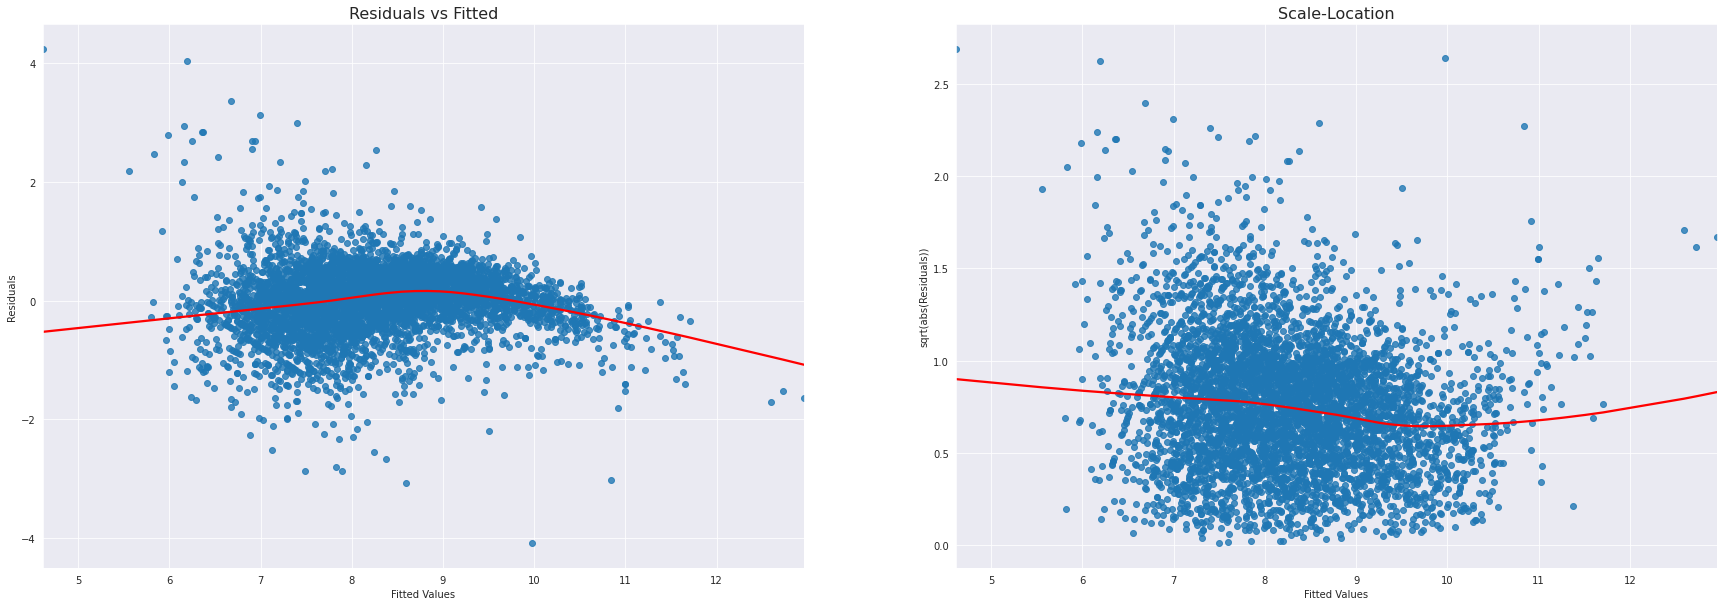

In [ ]:
fitted_vals = lr.predict()[:5000]
resids = lr.resid[:5000]
resids_standardized = lr.get_influence().resid_studentized_internal[:5000]
fig, ax = plt.subplots(1,2,figsize = (30,10))

sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Residuals vs Fitted', fontsize=16)
ax[0].set(xlabel='Fitted Values', ylabel='Residuals')
sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Scale-Location', fontsize=16)
ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

#### Assumption 5- NO  MULTI COLLINEARITY

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,ageOfVehicle,powerPS,No_of_days_online,kilometer_Enc,vehicleType_Enc,fuelType_Enc,model_Enc,brand_Enc,state_Enc,CountryOfManufacture_Enc,notRepairedDamage_Yes,gearbox_manual
vif,1.482481,1.974964,1.015267,1.356897,1.421517,1.236769,2.265674,2.214801,1.012671,1.333819,1.025145,1.304643


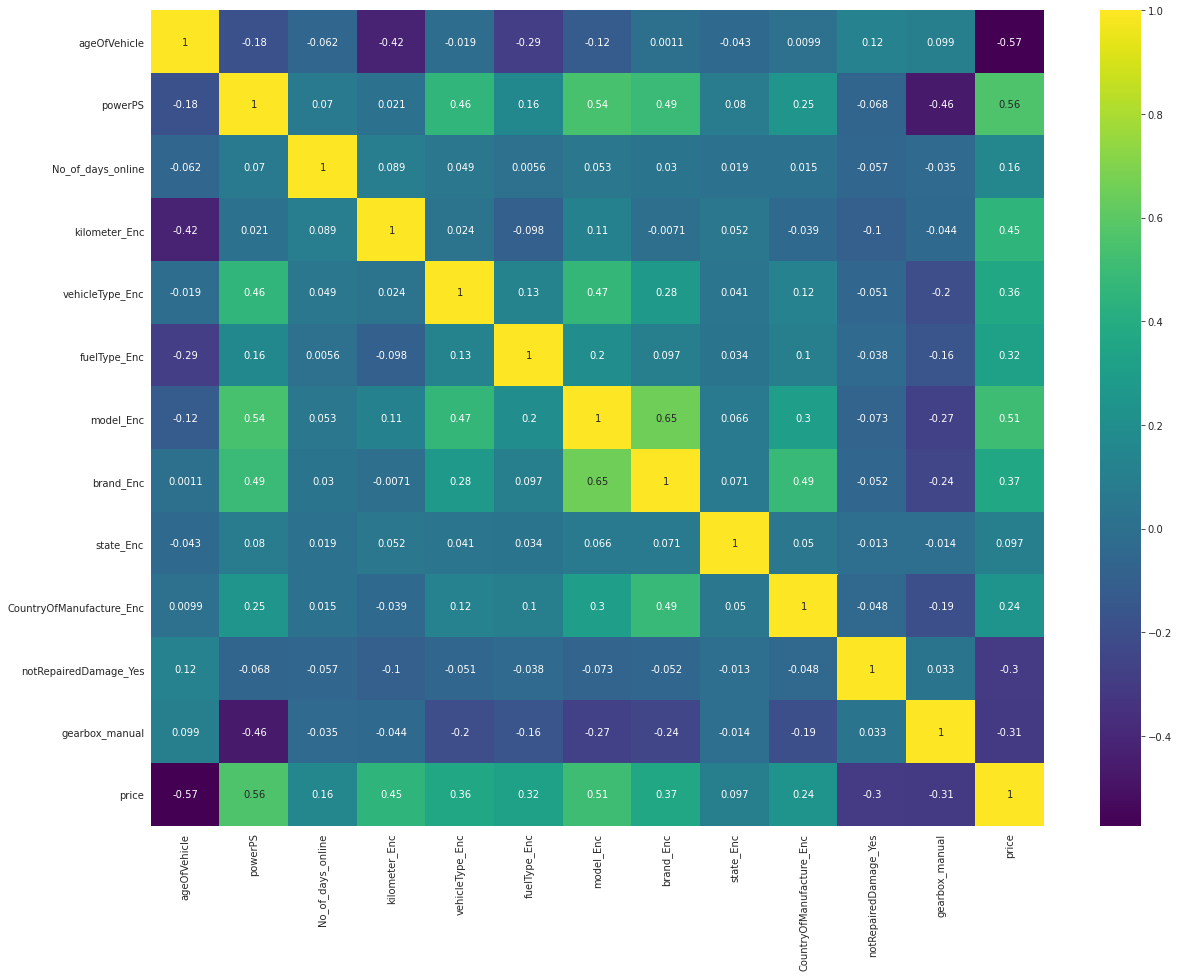

In [ ]:
X1 = X
X1['price'] = y
plt.figure(figsize = (20,15))
sns.heatmap(X1.corr() , annot = True , cmap = 'viridis')


There is no multicollinearity

**Assumptions Failed:**

        * Normality of Residuals